# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Road traffic accidents are a major health hazard in Saudi Arabia and the possibility of this happening is driving without a driver's license, where before receiving the license a driving test is carried out and the drivers are validated, so in this project, we will analyze the data of traffic accidents and driver license to find solutions

## Executive Summary

We have focused on two data sets in this project traffic accidents and driving licenses, and we find some correlate to each other which can we use to help us find solutions. We find that the number of accidents is declining over the years while the number of licenses is increasing, which is a very good indicator. We also find that there is an immense gap between Saudi Arabia's three main regions and the other regions.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [156]:
#Imports
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from matplotlib import colors


## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [157]:
#Code
accidents= pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', sep=';' )

In [158]:
licenses= pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',  sep=';' )

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [159]:
#Code
accidents.head() 

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"


In [160]:
licenses.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
Traffic-accidents: 
Year: All accidents between 2016 and 2017 have taken place. 
Region: 14 different areas, each with 6 accidents. 
geo_point_2d: refers to the position of the areas.
 Unnamed: 0 Unnamed: 0.1: it has no significance and the great chance that I will eliminate them.

Driving-licenses: 
Year: we have values from 25 different years, with the same number of licenses issuance per year which is 14 licenses
geo_point_2d: We have to miss 25 values. 
Administrative Area: we have 25 areas, and refers to the position of the areas.
Unnamed:0 : it has no meaning and the big chance that I'm gonna delete them

#### 4a. How complete is the data?

Investigate missing values etc.

In [161]:
#Code
accidents.isnull().sum() 

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [162]:
licenses.isnull().sum()

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [163]:
#Code
accidents.describe()

,Unnamed: 0,Unnamed: 0.1
count,84.000000,84.000000
mean,41.500000,41.500000
std,24.392622,24.392622
min,0.000000,0.000000
25%,20.750000,20.750000
50%,41.500000,41.500000
75%,62.250000,62.250000
max,83.000000,83.000000


In [164]:
print(" \n___Min___ \n" ,accidents.min() ," \n\n___Max___ \n", accidents.max())

 
___Min___ 
 Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object  

___Max___ 
 Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object


In [165]:
licenses.describe()

,Unnamed: 0
count,350.000000
mean,174.500000
std,101.180532
min,0.000000
25%,87.250000
50%,174.500000
75%,261.750000
max,349.000000


In [166]:
print(" \n___Min___ \n" ,licenses.min() ," \n\n___Max___ \n", licenses.max())

 
___Min___ 
 Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object  

___Max___ 
 Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [167]:
#code
accidents.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [168]:
licenses.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
In both datasets, there are several columns have unnamed and take different data type.
so, that must reset and correct the way the value of the columns is written.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [169]:
#code
accidents['Year']= accidents['Year'].apply(lambda x: x.replace('(',''))
accidents['Year']= accidents['Year'].apply(lambda x: x.replace(')',''))
accidents['Value']= accidents['Value'].apply(lambda x: x.replace('n',''))
accidents.head()


,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334"
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439"
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394"
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508"
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508"


In [170]:
licenses['Year']= licenses['Year'].apply(lambda x: x.replace('(',''))
licenses['Year']= licenses['Year'].apply(lambda x: x.replace(')',''))
licenses['Driving Liceses']= licenses['Driving Liceses'].apply(lambda x: x.replace('n',''))
licenses.head()


,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334"
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334"
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334"
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334"
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334"


- Make new columns `x` and `y` using `geo_point_2d`

In [171]:
#code
New_col = accidents["geo_point_2d"].str.split(",", n = 1, expand = True)   
accidents["y"]= New_col[0]   
accidents["x"]= New_col[1] 

In [172]:
New_col = licenses["geo_point_2d"].str.split(",", n = 1, expand = True)   
licenses["y"]= New_col[0]   
licenses["x"]= New_col[1] 

In [173]:
accidents.drop(columns =['Unnamed: 0','Unnamed: 0.1','geo_point_2d'],inplace= True)

In [174]:
licenses.drop(columns = ['Unnamed: 0','geo_point_2d'],inplace= True)

In [175]:
accidents.head()

,Year,Region,Indicator,Value,y,x
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


In [176]:
licenses.head()

,Year,Administritive Area,Driving Liceses,y,x
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


- Fix any individual values preventing other columns from being the appropriate type.

In [177]:
#code
accidents.dtypes

Year         object
Region       object
Indicator    object
Value        object
y            object
x            object
dtype: object

In [178]:
licenses.dtypes

Year                   object
Administritive Area    object
Driving Liceses        object
y                      object
x                      object
dtype: object

In [179]:
 #code
accidents['Year']= pd.to_numeric(accidents['Year'], errors="coerce").astype("int64")
accidents['Value']=pd.to_numeric(accidents['Value'], errors="coerce").astype("int64")
accidents['x']=pd.to_numeric(accidents['x'], errors="coerce").astype("float64")
accidents['y']=pd.to_numeric(accidents['y'], errors="coerce").astype("float64")

In [180]:
licenses['Year']= pd.to_numeric(licenses['Year'], errors="coerce").astype("int64")
licenses['Driving Liceses']=pd.to_numeric(licenses['Driving Liceses'], errors="coerce").astype("int64")
licenses['x']=pd.to_numeric(accidents['x'], errors="coerce").astype("float64")
licenses['y']=pd.to_numeric(licenses['y'], errors="coerce").astype("float64")

- Finish your data modifications by making sure the columns are now typed appropriately.

In [181]:
#code
accidents.dtypes

Year           int64
Region        object
Indicator     object
Value          int64
y            float64
x            float64
dtype: object

In [182]:
licenses.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
y                      float64
x                      float64
dtype: object

- Display the data types again to confirm they are correct.

In [183]:
#Code:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       84 non-null     int64  
 1   Region     84 non-null     object 
 2   Indicator  84 non-null     object 
 3   Value      84 non-null     int64  
 4   y          78 non-null     float64
 5   x          78 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.1+ KB


In [184]:
licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 350 non-null    int64  
 1   Administritive Area  350 non-null    object 
 2   Driving Liceses      350 non-null    int64  
 3   y                    325 non-null    float64
 4   x                    78 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 13.8+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [185]:
#code
accidents.rename(columns = {'Indicator':'Type_of_accidents','Value': 
                                 'Num_of_accidents','y':'longitude_y','x':'latitude_x'},inplace=True)



licenses.rename(columns = {'Administritive Area':'Region',
                                 'Driving Liceses':'Driving_liceses','y':'longitude_y','x':'latitude_x'},inplace=True)


In [186]:
accidents.head(2)

,Year,Region,Type_of_accidents,Num_of_accidents,longitude_y,latitude_x
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.26369
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.14783


In [187]:
licenses.head(2)

,Year,Region,Driving_liceses,longitude_y,latitude_x
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,50.14783


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|Year|int|Driving_Licenses|The year where the Licenses issued| 
|Region|str|Driving_Licenses|13 region of Saudi Arabia|
|Driving_Liceses|int|Driving_Licenses|the number of Licenses|
|longitude_y|float|Driving_Licenses|y_Coordinate for a region|
|latitude_x|float|Driving_Licenses|x_Coordinate for a region|


|Feature|Type|Dataset|Description|
|---|---|---|---|
|Year|int|Traffic_Accidents|The year where the accident happend|
|Region|str|Traffic_Accidents|13 region of Saudi Arabia|
|Type_of_Accidents|str|Traffic_Accidents|ether it's # of Casualties or # of of Accidents|
|longitude_y|float|Traffic_Accidents|y_Coordinate for a region|
|latitude_x|float|Traffic_Accidents|x_Coordinate for a region|

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [188]:
#Before drop the 'total' row in first Dataset
accidents.Region.unique() 

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [189]:
accidents[accidents['Region'] != 'Total'].groupby(by=['Year', 'Type_of_accidents']).sum().tail(2)

Num_of_accidents  longitude_y  latitude_x
Year Type_of_accidents                                                     
2017 No. of Casualties - Dead                 7489   309.535811  553.836254
     No. of Casualties - Injured             33199   309.535811  553.836254

In [190]:
accidents[accidents['Region'] == 'Total'].groupby(by=['Year', 'Type_of_accidents']).sum().tail(2)

Num_of_accidents  longitude_y  latitude_x
Year Type_of_accidents                                                     
2017 No. of Casualties - Dead                 7489          0.0         0.0
     No. of Casualties - Injured             33199          0.0         0.0

In [191]:
accidents.drop(accidents[accidents['Region'] == 'Total'].index, inplace=True)

In [192]:
#After drop the 'total' row in first Dataset
accidents.Region.unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Al-Baaha', 'Riyadh', 'Madinah', 'Qassim',
       'Najran', 'Asir'], dtype=object)

In [193]:
#Before drop the 'total'row in second Dataset
licenses.Region.unique() 

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

In [194]:
licenses[licenses['Region'] != 'Total'].groupby(by=['Year']).sum().tail(2)

,Driving_liceses,longitude_y,latitude_x
Year,,,
2016,697017,309.535811,41.440696
2017,928165,309.535811,92.800411


In [195]:
licenses[licenses['Region'] == 'Total'].sort_values(by='Year').tail(2)

,Year,Region,Driving_liceses,longitude_y,latitude_x
314,2016,Total,697017,NaN,NaN
59,2017,Total,928165,NaN,42.652581


In [196]:
licenses.drop(licenses[licenses['Region'] == 'Total'].index, inplace=True)

In [197]:
#After drop the row in second Dataset
licenses.Region.unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

In [198]:
accidents['Region']= accidents['Region'].apply(lambda x: x.replace('Qassim','Al-Qaseem'))
accidents['Region']= accidents['Region'].apply(lambda x: x.replace('Al-Baaha','Al-Baha'))
accidents['Region']= accidents['Region'].apply(lambda x: x.replace('Asir','Assir'))

In [199]:
licenses['Region']= licenses['Region'].apply(lambda x: x.replace('Eastern','Eastern Region'))

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [200]:
#code
#It's wide for the accident, the indicator is melt to be row instead of the column which causes duplicates.

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [201]:
#code
accidents_pv = pd.pivot_table(accidents, index=['Year','Region'], columns=['Type_of_accidents'], values='Num_of_accidents')
accidents_pv.head(3)

Type_of_accidents  No. of Accidents  No. of Casualties - Dead  \
Year Region                                                     
2016 Al-Baha                   3618                       185   
     Al-Jouf                  10212                       245   
     Al-Qaseem                25664                       397   

Type_of_accidents  No. of Casualties - Injured  
Year Region                                     
2016 Al-Baha                              1227  
     Al-Jouf                               920  
     Al-Qaseem                            1513

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [202]:
#code
df_merged = pd.merge(accidents_pv,licenses, on=['Year','Region'],how='inner')#Use "inner"To avoid null values
df_merged.head()


,Year,Region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,Driving_liceses,longitude_y,latitude_x
0,2016,Al-Baha,3618,185,1227,4614,20.148406,41.440696
1,2016,Al-Jouf,10212,245,920,9371,29.967745,NaN
2,2016,Al-Qaseem,25664,397,1513,9180,26.196706,NaN
3,2016,Assir,32684,983,2541,41367,19.138785,NaN
4,2016,Eastern Region,101619,1113,4893,142307,23.288331,NaN


In [203]:
#rename the columns 
df_merged.rename(columns={'No. of Accidents':'Num_of_accidents',
                          'No. of Casualties - Dead':'Num_Dead',
                          'No. of Casualties - Injured':'Num_Injured' },inplace=True)

df_merged.head()

,Year,Region,Num_of_accidents,Num_Dead,Num_Injured,Driving_liceses,longitude_y,latitude_x
0,2016,Al-Baha,3618,185,1227,4614,20.148406,41.440696
1,2016,Al-Jouf,10212,245,920,9371,29.967745,NaN
2,2016,Al-Qaseem,25664,397,1513,9180,26.196706,NaN
3,2016,Assir,32684,983,2541,41367,19.138785,NaN
4,2016,Eastern Region,101619,1113,4893,142307,23.288331,NaN


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [204]:
#code
df_merged.to_csv('combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [205]:
#Code:
df_merged.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,26.0,2016.500000,0.509902,2016.000000,2016.000000,2016.500000,2017.000000,2017.000000
Num_of_accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
Num_Dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
Num_Injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000
Driving_liceses,26.0,62507.000000,107293.917762,2153.000000,8363.250000,16085.000000,51222.000000,495307.000000
longitude_y,26.0,23.810447,4.274533,17.207231,20.148406,23.288331,27.400846,30.197075
latitude_x,3.0,44.747036,4.716312,41.440696,42.046638,42.652581,46.400205,50.147830


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [206]:
#code
import math    
def variance(series):
    try:
        v=sum((series - series.mean())**2)/(len(series))
        return v
    except:
         return np.nan

def std_dev(series):
    try:    
        var = variance(series)
        std_dev = math.sqrt(var)
        return std_dev
    except:
         return np.nan

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [207]:
#Code:
std = dict((x, y) for x,y in df_merged.apply(std_dev).iteritems())
std

{'Year': 0.5,
 'Region': nan,
 'Num_of_accidents': 45590.82869880505,
 'Num_Dead': 539.1069593406002,
 'Num_Injured': 2865.8854113220236,
 'Driving_liceses': 105210.34237659337,
 'longitude_y': 4.191524025811861,
 'latitude_x': nan}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

In [208]:
df_merged.std() #useing std of pandas

Year                     0.509902
Num_of_accidents     46493.705035
Num_Dead               549.783381
Num_Injured           2922.641127
Driving_liceses     107293.917762
longitude_y              4.274533
latitude_x               4.716312
dtype: float64

In [209]:
np.std(df_merged)#useing std of numpy

Year                     0.500000
Num_of_accidents     45590.828699
Num_Dead               539.106959
Num_Injured           2865.885411
Driving_liceses     105210.342377
longitude_y              4.191524
latitude_x               3.850853
dtype: float64

Answer: The values of Manually function it's similar to NumPy function and it's approximate values to pandas.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [210]:
#code
df_merged.head()

,Year,Region,Num_of_accidents,Num_Dead,Num_Injured,Driving_liceses,longitude_y,latitude_x
0,2016,Al-Baha,3618,185,1227,4614,20.148406,41.440696
1,2016,Al-Jouf,10212,245,920,9371,29.967745,NaN
2,2016,Al-Qaseem,25664,397,1513,9180,26.196706,NaN
3,2016,Assir,32684,983,2541,41367,19.138785,NaN
4,2016,Eastern Region,101619,1113,4893,142307,23.288331,NaN


In [211]:
# Which regions have the 'highest' Driving Licenses based on years (1993 - 2017)
max=licenses.groupby(['Year','Region','Driving_liceses'],as_index=False)['Driving_liceses'].max()
max.sort_values('Driving_liceses', ascending=False).head(3)

,Year,Region,Driving_liceses
323,2017,Riyadh,495307
310,2016,Riyadh,242851
284,2014,Riyadh,194208


In [212]:
# Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
min=licenses.groupby(['Year','Region','Driving_liceses'],as_index=False)['Driving_liceses'].min()
min.sort_values('Driving_liceses', ascending=True)

,Year,Region,Driving_liceses
298,2015,Tabouk,915
182,2007,Al-Baha,997
36,1995,Northern Boarder,1318
49,1996,Northern Boarder,1383
23,1994,Northern Boarder,1457
...,...,...,...
294,2015,Makkah,157389
271,2013,Riyadh,165994
284,2014,Riyadh,194208
310,2016,Riyadh,242851


In [213]:
# Which regions have 'the highest' mean Traffic Accidents numbers for years (2016 - 2017)
accidents[accidents['Year'].isin([2016,2017])].groupby(['Region','Year']).mean().sort_values('Num_of_accidents', 
                                                                                             ascending=False).head(2)

Num_of_accidents  longitude_y  latitude_x
Region Year                                           
Makkah 2017      52601.666667    21.628963    41.26369
       2016      49821.333333    21.628963    41.26369

In [214]:
# Which regions have the 'lowest' mean Traffic Accidents numbers for years (2016 - 2017)
accidents[accidents['Year'].isin([2016,2017])].groupby(['Region','Year']).mean().sort_values('Num_of_accidents', 
                                                                                             ascending=False).tail(2)

,,Num_of_accidents,longitude_y,latitude_x
Region,Year,,,
Najran,2016,1371.333333,18.451100,46.868850
Al-Baha,2017,851.666667,20.148406,41.466548


In [215]:
#What are the regions that have more Driving Licenses issued in each year than the year average?
y_mean = licenses.groupby('Year')['Driving_liceses'].mean().reset_index()
y_average = pd.DataFrame([])

#for loop in year mean and comparing if mean of year licenses issued greater than mean of years append in the new dataframe to display

for year in y_mean['Year']:
    if len(licenses[(licenses['Driving_liceses'] > y_mean[y_mean['Year'] == year].iloc[0]['Driving_liceses']) & \
              (df_merged['Year'] == year)].index) > 0:
        y_average = y_average.append(pd.DataFrame(licenses[(licenses['Driving_liceses'] > y_mean[y_mean['Year'] == year].iloc[0]['Driving_liceses']) & \
              (licenses['Year'] == year)]))

y_average


,Year,Region,Driving_liceses,longitude_y,latitude_x
158,2016,Makkah,136055,21.628963,NaN
215,2016,Hail,54507,27.400846,NaN
256,2016,Eastern Region,142307,23.288331,NaN
293,2016,Riyadh,242851,23.081434,NaN
94,2017,Eastern Region,126816,23.288331,NaN
157,2017,Makkah,142487,21.628963,NaN
292,2017,Riyadh,495307,23.081434,NaN


In [216]:
# What are the regions that have more Traffic Accidents happened in each year than the year average?
y_mean = accidents.groupby('Year')['Num_of_accidents'].mean().reset_index()
average_mean = []

for year in y_mean['Year']:
    if len(df_merged[(df_merged['Num_of_accidents'] > y_mean[y_mean['Year'] == year].iloc[0]['Num_of_accidents']) & \
              (df_merged['Year'] == year)].index) > 0:
        average_mean.append(pd.DataFrame(df_merged[(df_merged['Num_of_accidents'] > y_mean[y_mean['Year'] == year].iloc[0]['Num_of_accidents']) & \
              (df_merged['Year'] == year)]))
    
for df in average_mean:
    print(df.iloc[:,:3])

    Year          Region  Num_of_accidents
2   2016       Al-Qaseem             25664
3   2016           Assir             32684
4   2016  Eastern Region            101619
6   2016           Jazan             25873
8   2016          Makkah            134838
11  2016          Riyadh            141736
12  2016          Tabouk             16031
    Year          Region  Num_of_accidents
15  2017       Al-Qaseem             22405
16  2017           Assir             25245
17  2017  Eastern Region             81433
19  2017           Jazan             22161
20  2017         Madinah             16070
21  2017          Makkah            145541
24  2017          Riyadh             99925


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

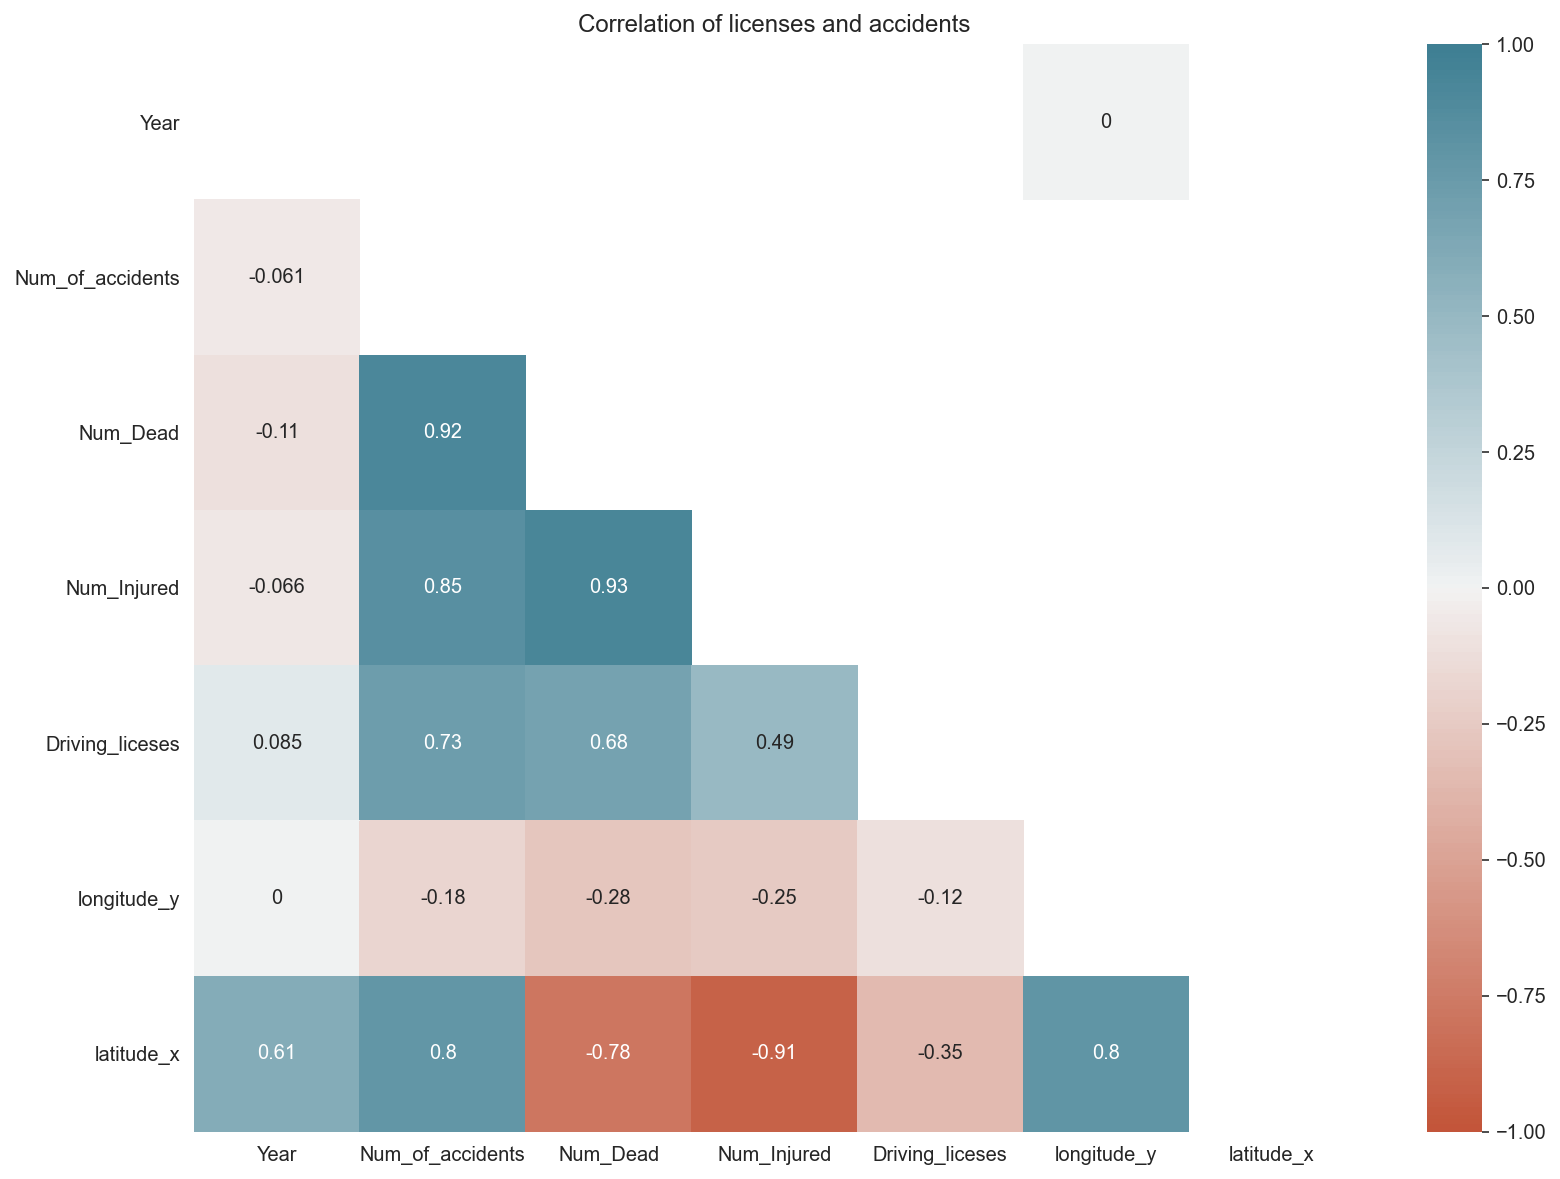

In [217]:
plt.figure(figsize=(13,10))
matrix = np.triu(df_merged.corr())
sns.heatmap(df_merged.corr(), annot=True, mask=matrix , vmin=-1, vmax=1, center= 0, cmap=sns.diverging_palette(20, 220, n=200));
plt.title('Correlation of licenses and accidents');

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [218]:
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import scipy

In [219]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(int(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig , ax = plt.subplots(ncols=2 , nrows=nrows , sharey=True , tight_layout=True,figsize=(15, 15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        # feel free to add more settings
        ax[i].hist(dataframe[column])
        if i == 0:
            ax[i].set_title(list_of_titles[i])
            ax[i].set_xlabel(list_of_xlabels[i])
        else:
            ax[i].set_title(list_of_titles[i])
            ax[i].set_xlabel(list_of_xlabels[i])

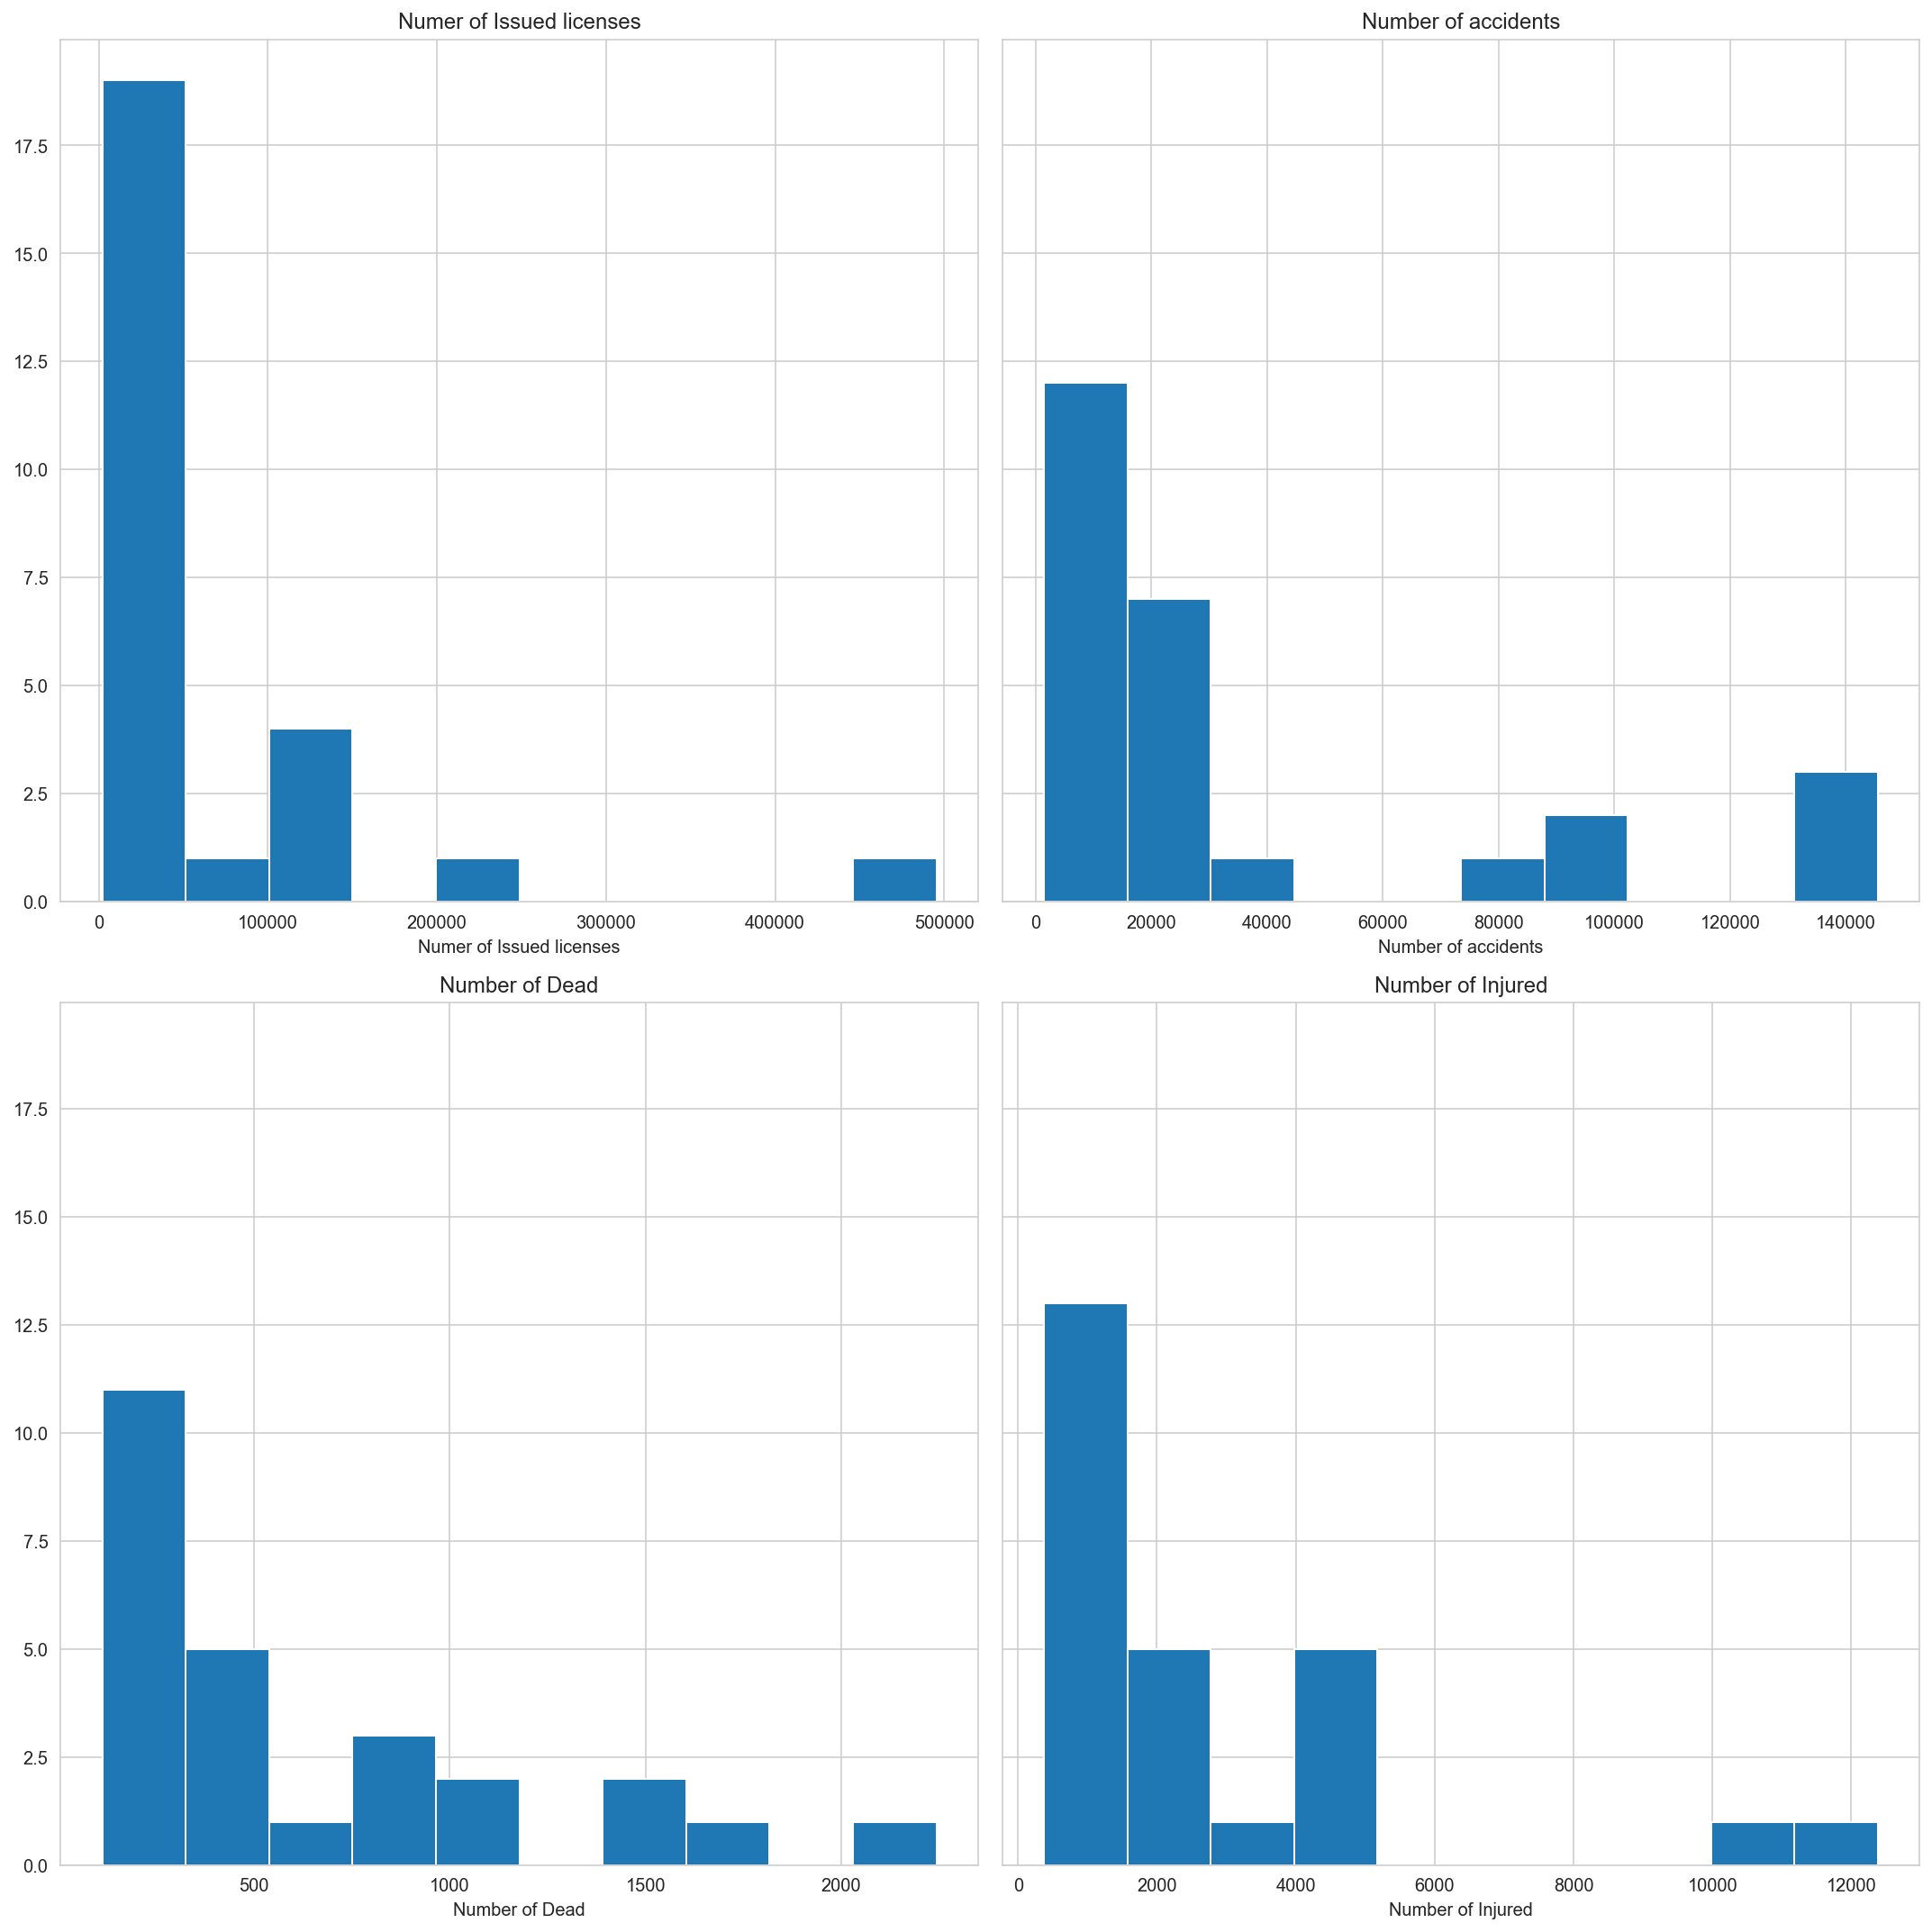

In [220]:
columns_list = ['Driving_liceses', 'Num_of_accidents', 'Num_Dead', 'Num_Injured']
list_of_xlabels = ['Numer of Issued licenses', 'Number of accidents', 'Number of Dead', 'Number of Injured']
title_name = ['Numer of Issued licenses', 'Number of accidents', 'Number of Dead', 'Number of Injured']
subplot_histograms(df_merged, columns_list, title_name , list_of_xlabels);

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

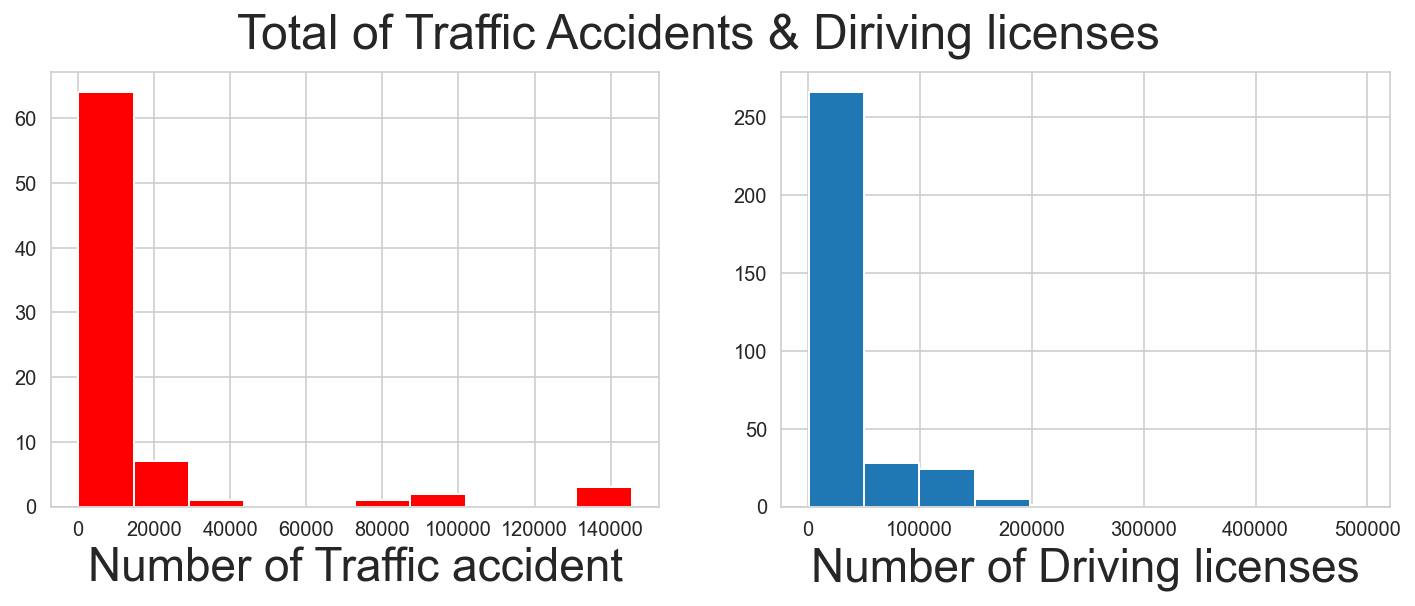

In [221]:
# Code
# Driving Licenses number
fig, ax = plt.subplots(ncols=2, figsize=(12, 4) )
ax[0].hist(accidents['Num_of_accidents'], bins=10 , color='r')
ax[0].set_xlabel('Number of Traffic accident', fontsize=23)
# ax[1].xlabel = 'Number of accidents'
ax[1].hist(licenses['Driving_liceses'], bins=10)
ax[1].set_xlabel('Number of Driving licenses', fontsize=23)
# plt.hist(x, bins=20)
fig.suptitle('Total of Traffic Accidents & Diriving licenses', fontsize=24)
plt.show()

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


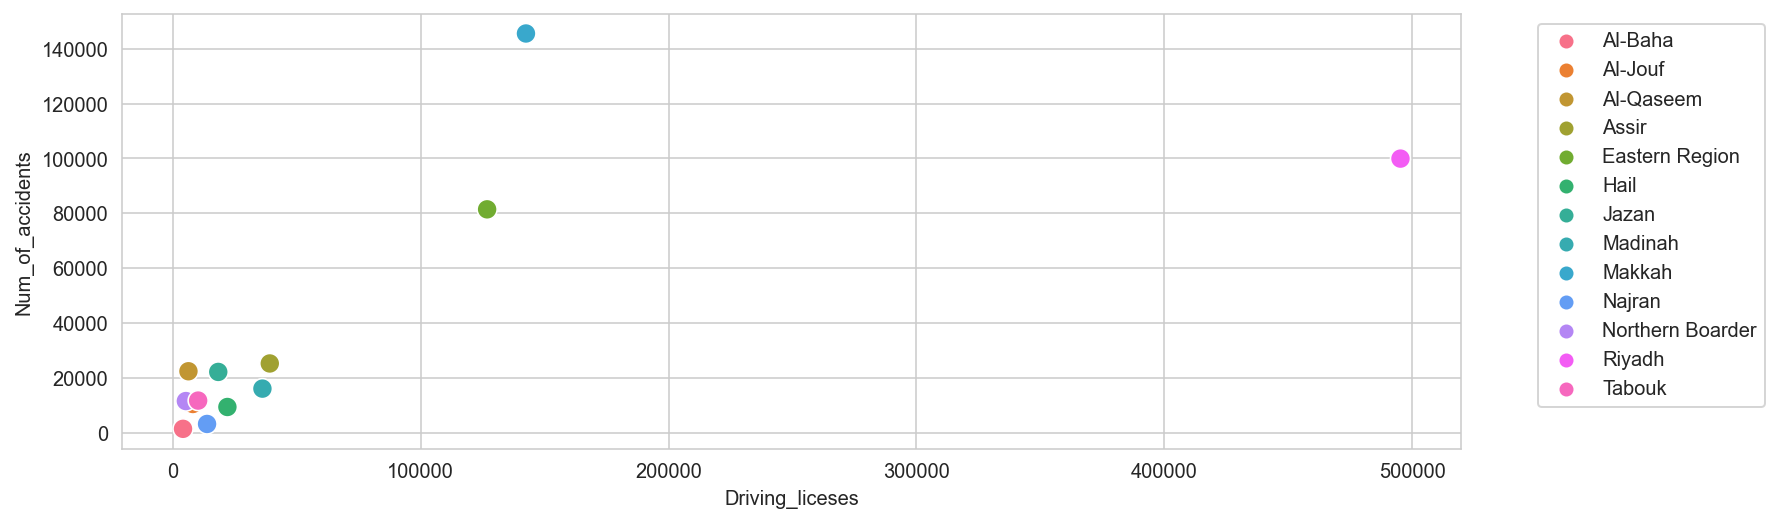

In [222]:
# Code
# Driving Licenses vs. Traffic Accidents for 2017
fig=plt.subplots( figsize=(12, 4))
S=df_merged[df_merged['Year'] == 2017]
sns.scatterplot( data=S, x='Driving_liceses', y='Num_of_accidents',hue='Region', s=100);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2 );
plt.show()

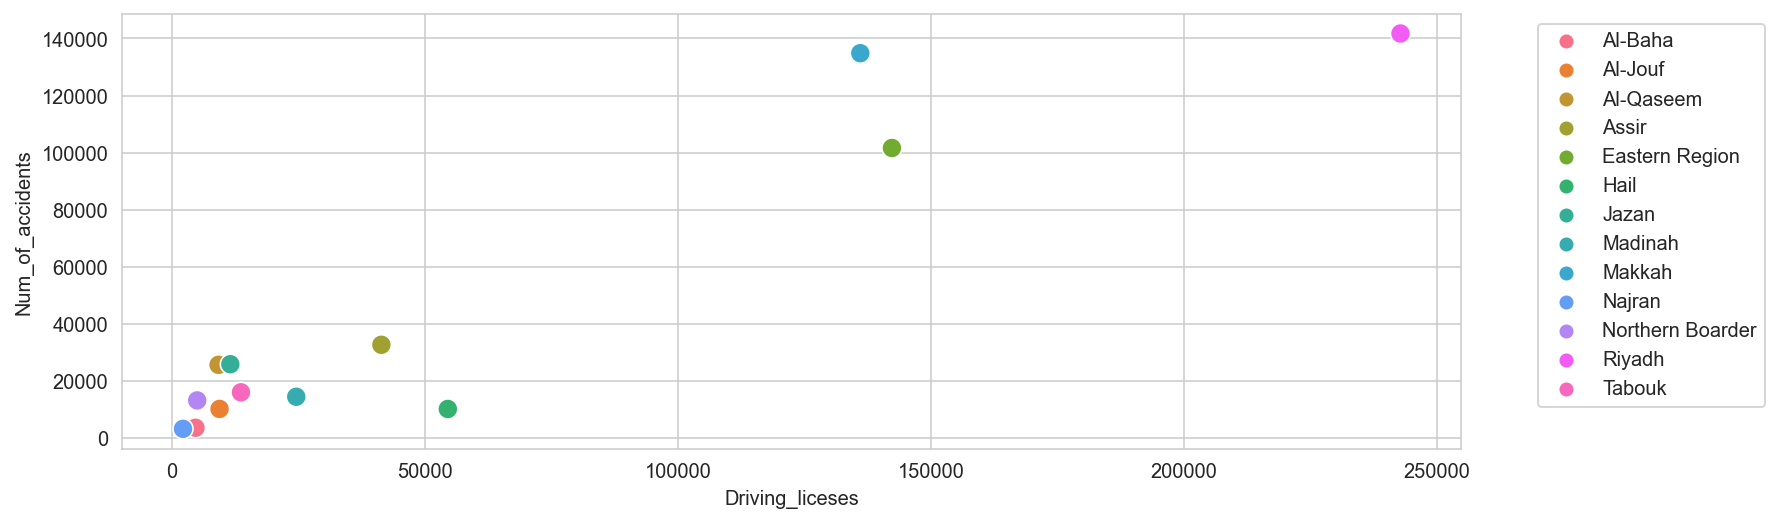

In [223]:
#- Driving Licenses vs. Traffic Accidents for 2016
fig=plt.subplots( figsize=(12, 4))
S=df_merged[df_merged['Year'] == 2016]
sns.scatterplot( data=S, x='Driving_liceses', y='Num_of_accidents',hue='Region', s=100);

plt.legend(bbox_to_anchor=(1.05, 1), loc=2 );
plt.show()

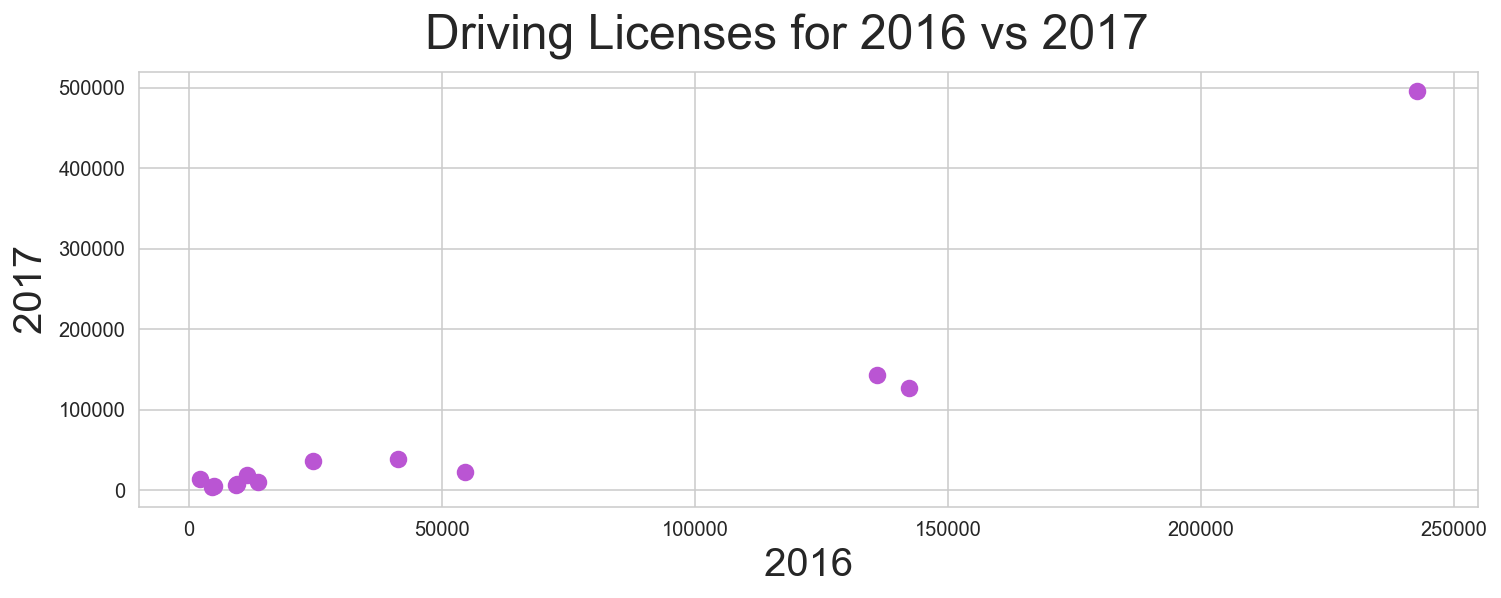

In [224]:
# Driving Licenses for 2016 vs 2017

Licenses_2016 = df_merged.loc[df_merged['Year'] == 2016, "Driving_liceses"]
Licenses_2017 = df_merged.loc[df_merged['Year'] == 2017, "Driving_liceses"]

fig, ax = plt.subplots( figsize=(12, 4))
plt.scatter(Licenses_2016 , Licenses_2017, s=60 , color='mediumorchid')
plt.xlabel(' 2016 ', fontsize=20)
plt.ylabel(' 2017 ', fontsize=20)
fig.suptitle('Driving Licenses for 2016 vs 2017', fontsize=24)
plt.show()

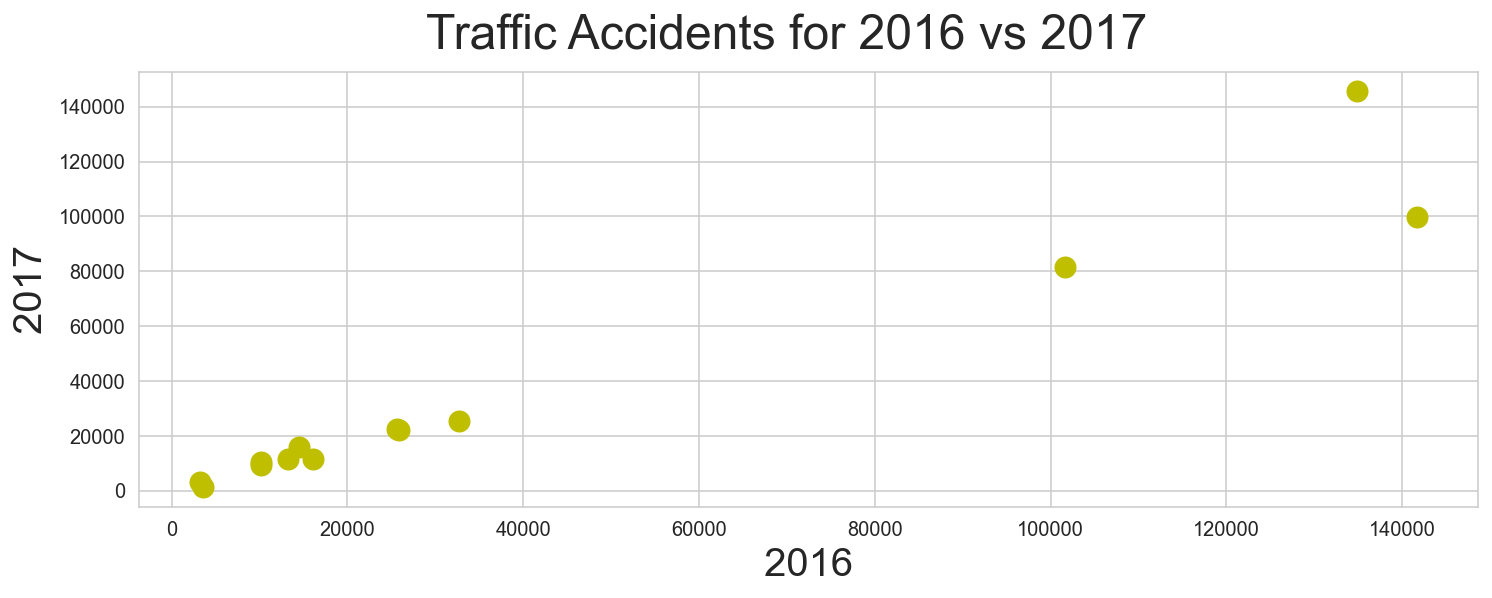

In [225]:
#Traffic Accidents for 2016 vs 2017
accident_2016 = df_merged.loc[df_merged['Year'] == 2016, "Num_of_accidents"]
accident_2017 = df_merged.loc[df_merged['Year'] == 2017, "Num_of_accidents"]


fig, ax = plt.subplots( figsize=(12, 4))
plt.scatter(accident_2016,accident_2017, s=100 , color='y')
plt.xlabel(' 2016 ', fontsize=20)
plt.ylabel(' 2017 ', fontsize=20)
fig.suptitle('Traffic Accidents for 2016 vs 2017', fontsize=24);
plt.show()

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [226]:
# Code
def var_standardized(v):
        stand= (v - v.mean()) / df_merged.std()
        return stand


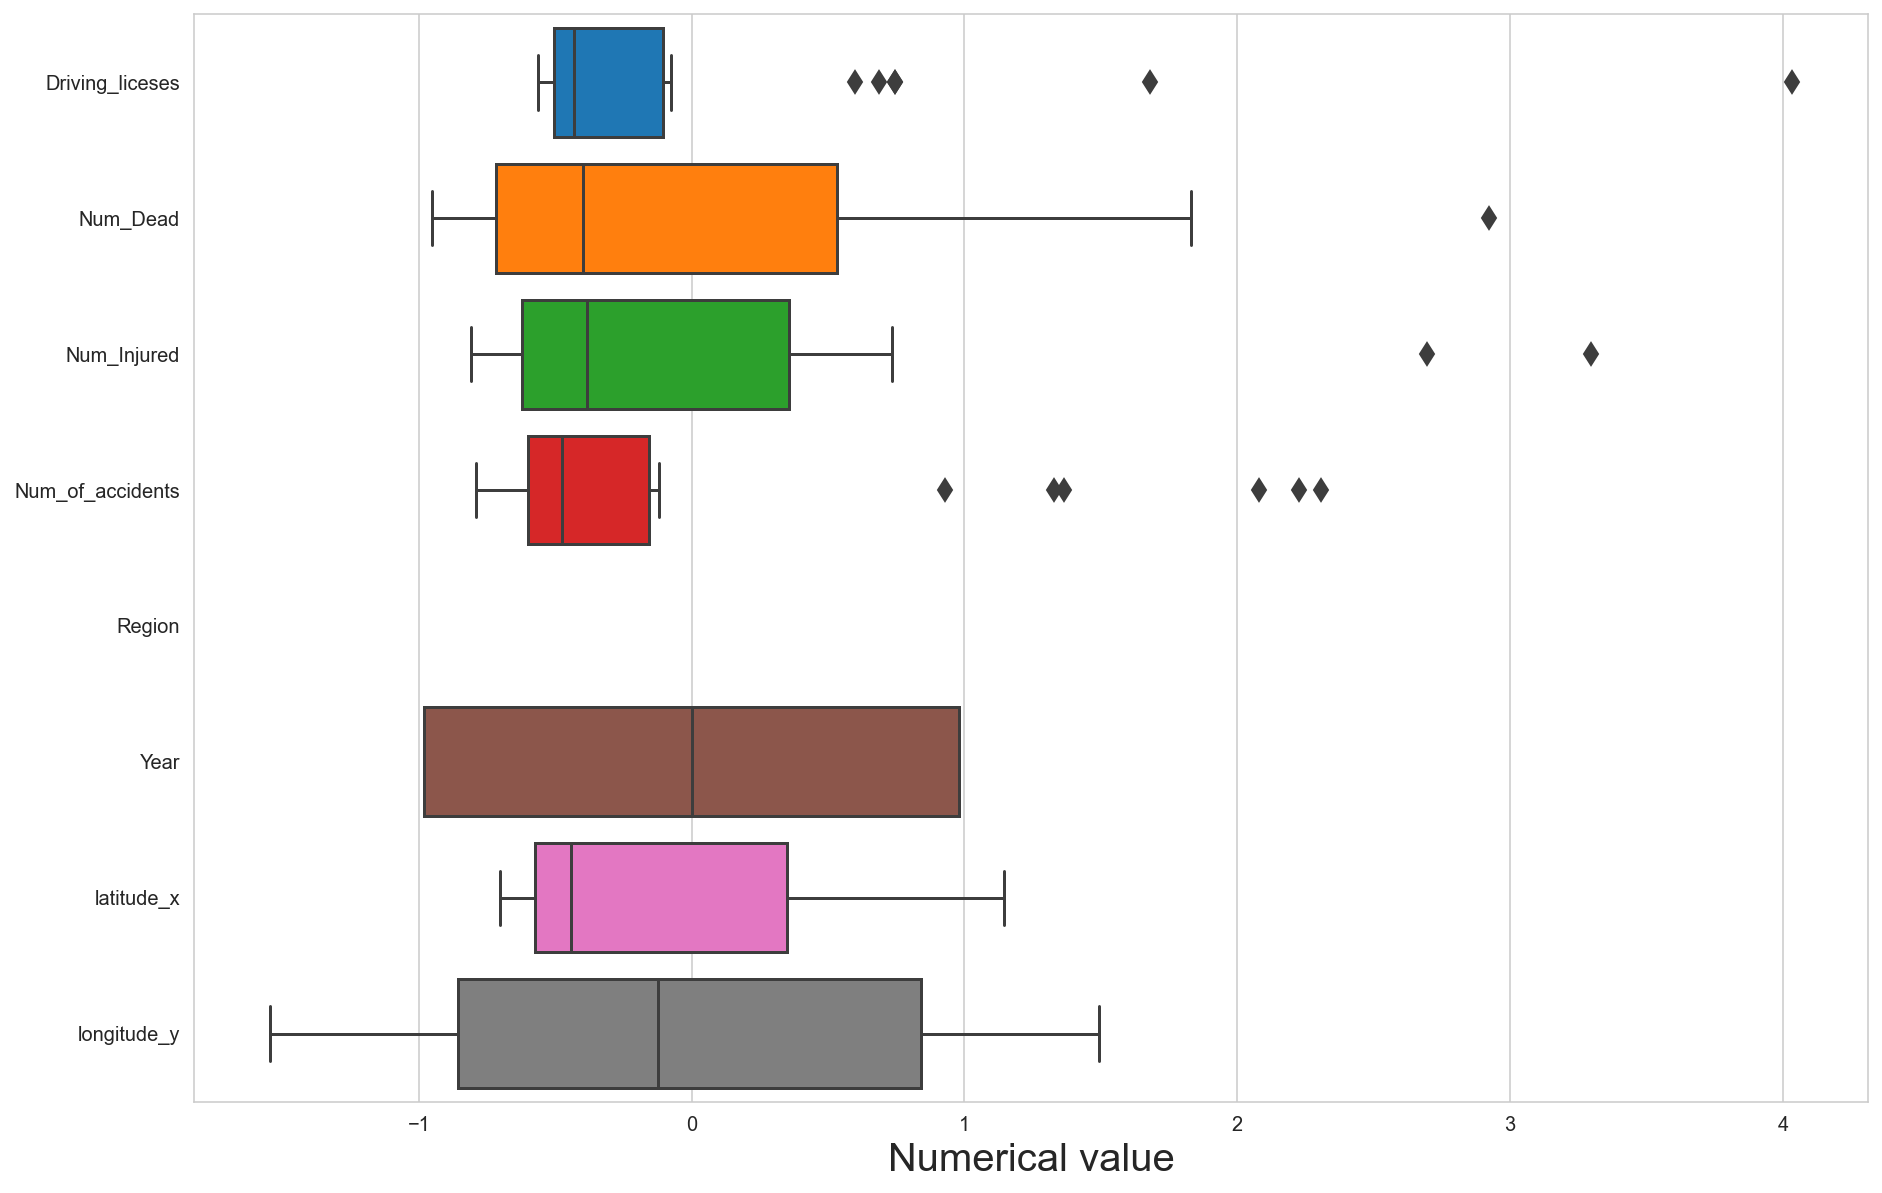

In [227]:
df_stand = var_standardized(df_merged)
fig, ax1 = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df_stand, orient='h', fliersize=8, linewidth=1.5, saturation=1.5, ax=ax1)
plt.xlabel('Numerical value', size=20);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:441: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,


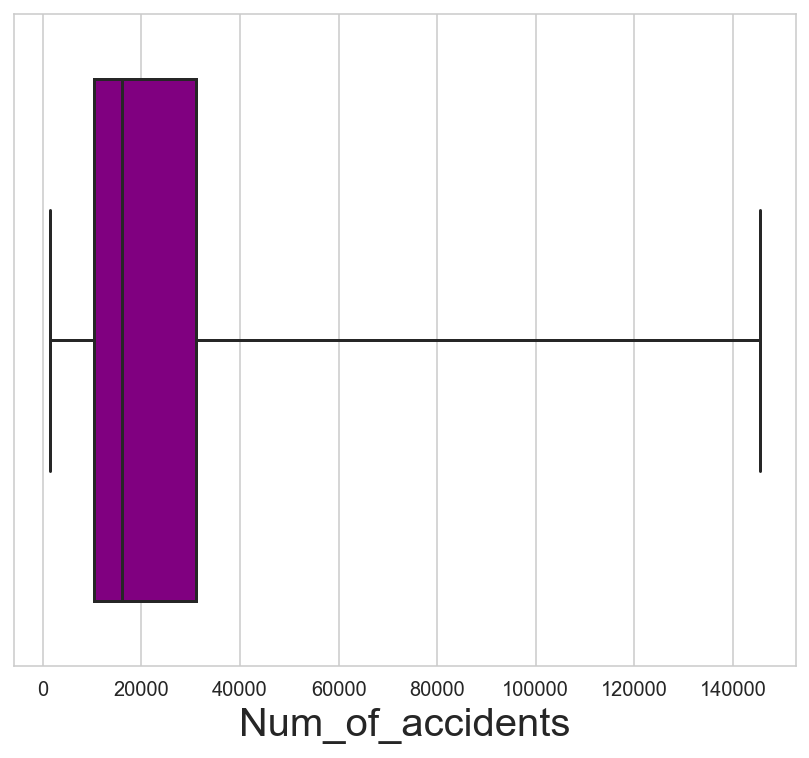

In [228]:
# Code
c1 = "purple"
fig = plt.subplots(figsize=((7, 6)))
sns.boxplot(x='Num_of_accidents', data=df_merged, orient='v',saturation=1.5 , whis="range", color=c1  )
plt.xlabel('Num_of_accidents', size=20);


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:441: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,


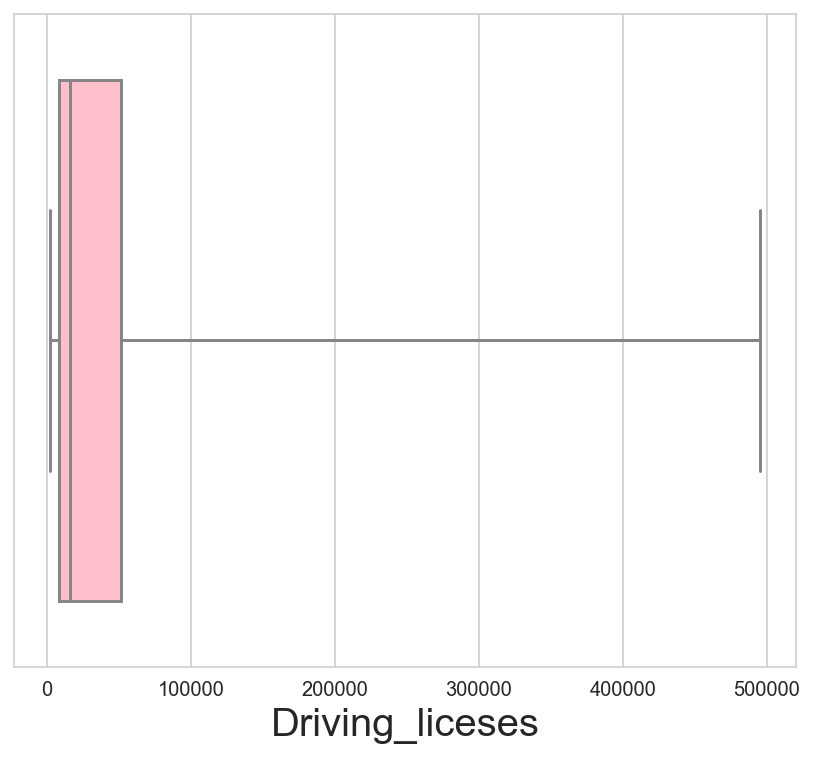

In [229]:
c1 = "pink"
fig = plt.subplots(figsize=((7, 6)))
sns.boxplot(x='Driving_liceses', data=df_merged, orient='v',saturation=1.5 , whis="range", color=c1  )
plt.xlabel('Driving_liceses', size=20);


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:441: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,


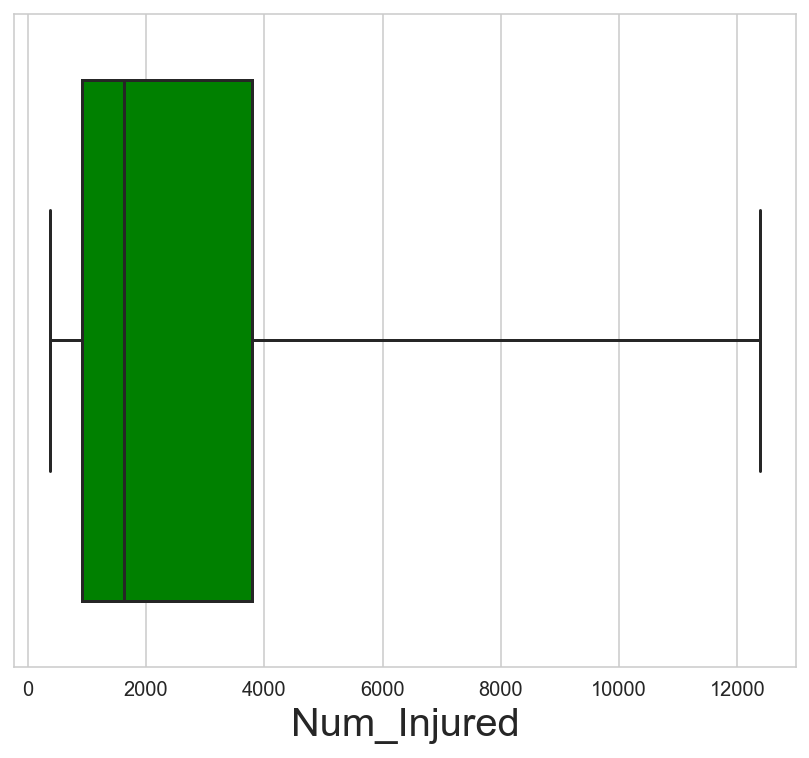

In [230]:
c1 = "green"
fig = plt.subplots(figsize=((7, 6)))
sns.boxplot(x='Num_Injured', data=df_merged, orient='v',saturation=1.5 , whis="range", color=c1  )
plt.xlabel('Num_Injured',size=20);

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


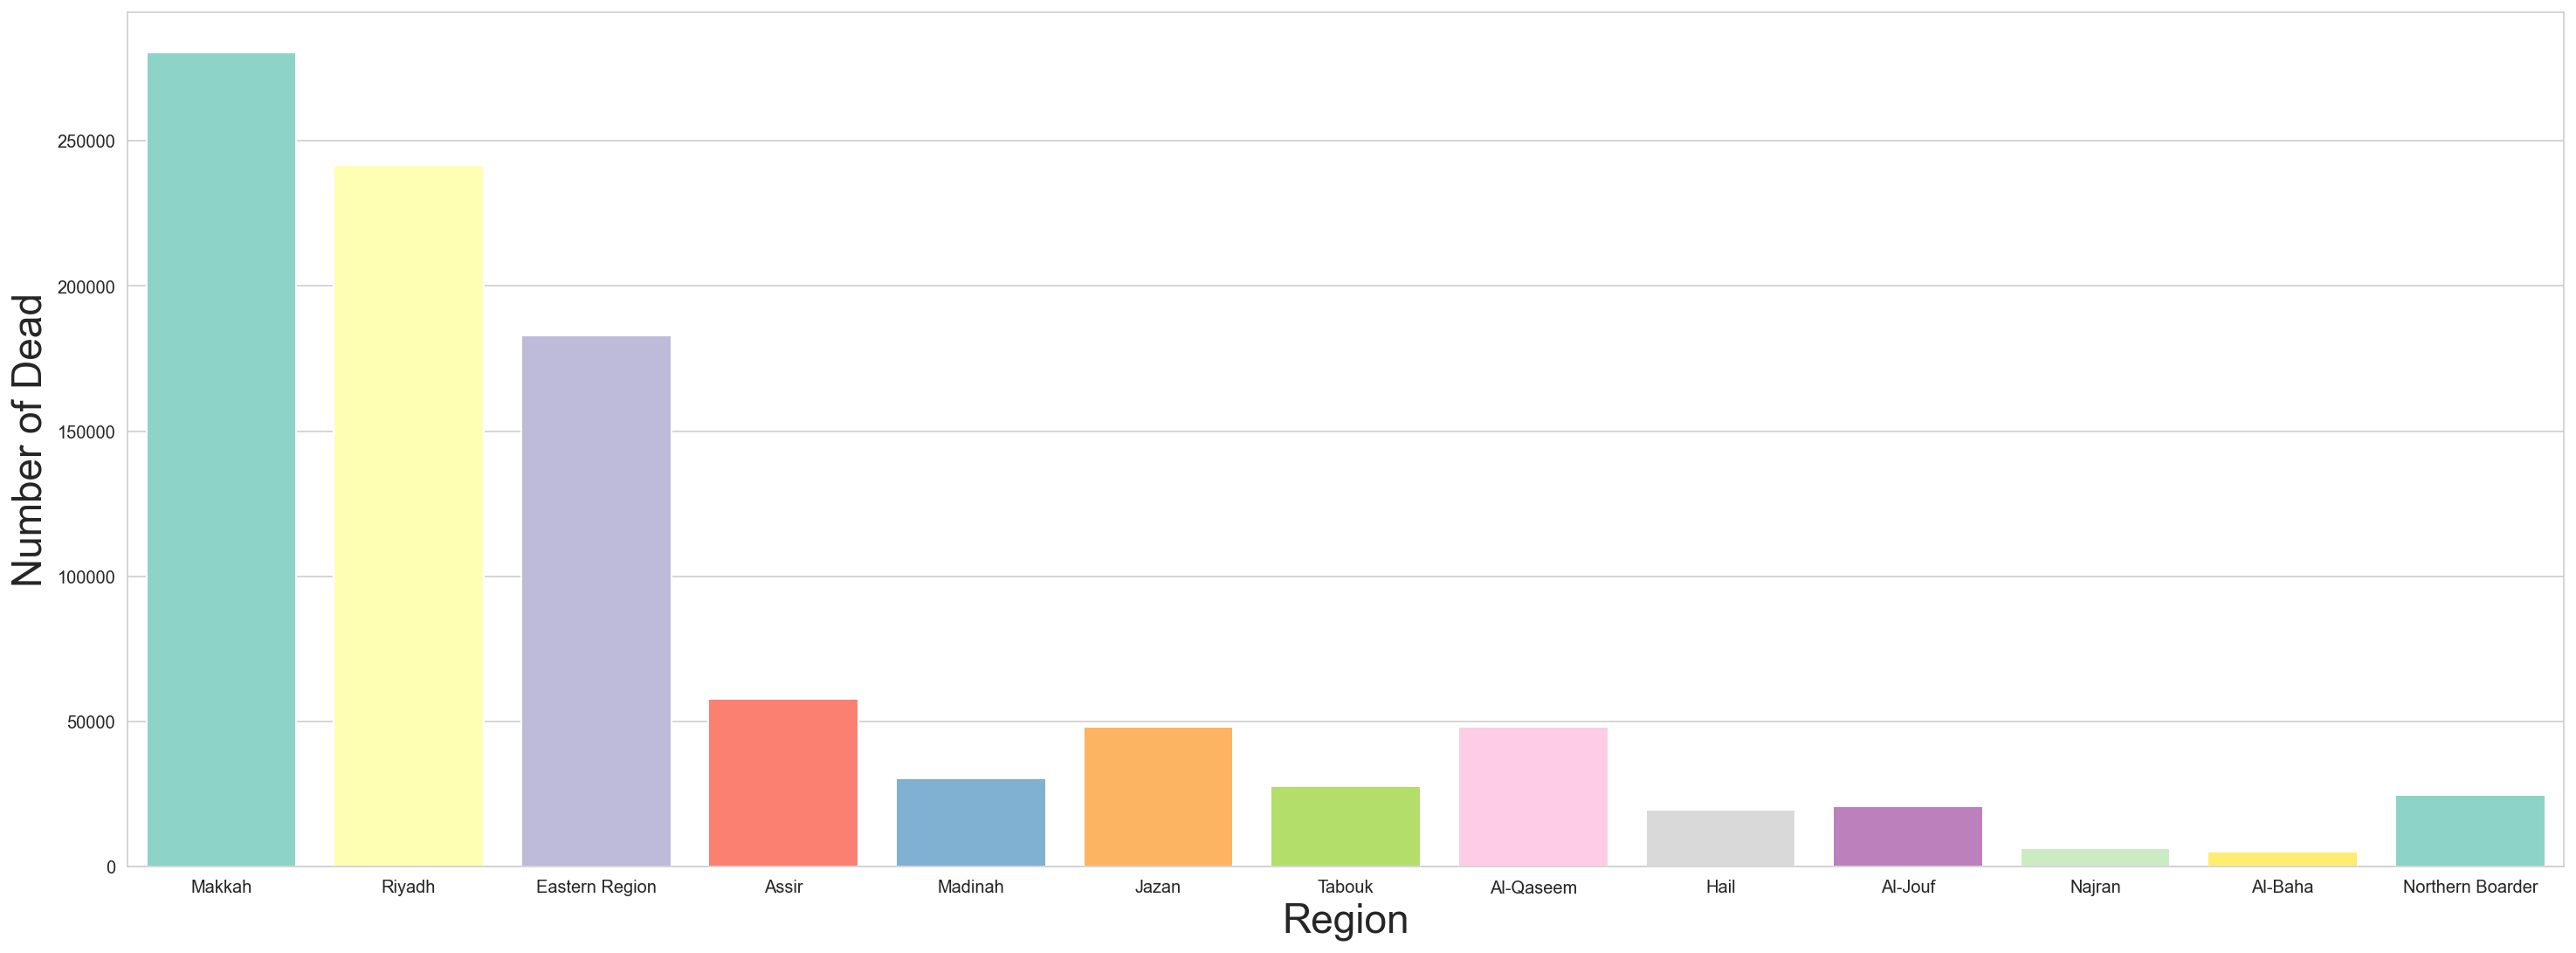

In [231]:
#shows Number of Dead in all Region
fig= plt.figure(figsize=(25,9))
sns.barplot(df_merged.groupby(['Region']).sum().sort_values(by = 'Num_Dead', ascending= False).index,
           df_merged.groupby(['Region']).sum().sort_values(by = 'Num_Dead', ascending= False)['Num_of_accidents'],
            saturation=5,palette='Set3');

plt.ylabel('Number of Dead', size=23)
plt.xlabel('Region', size=23);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


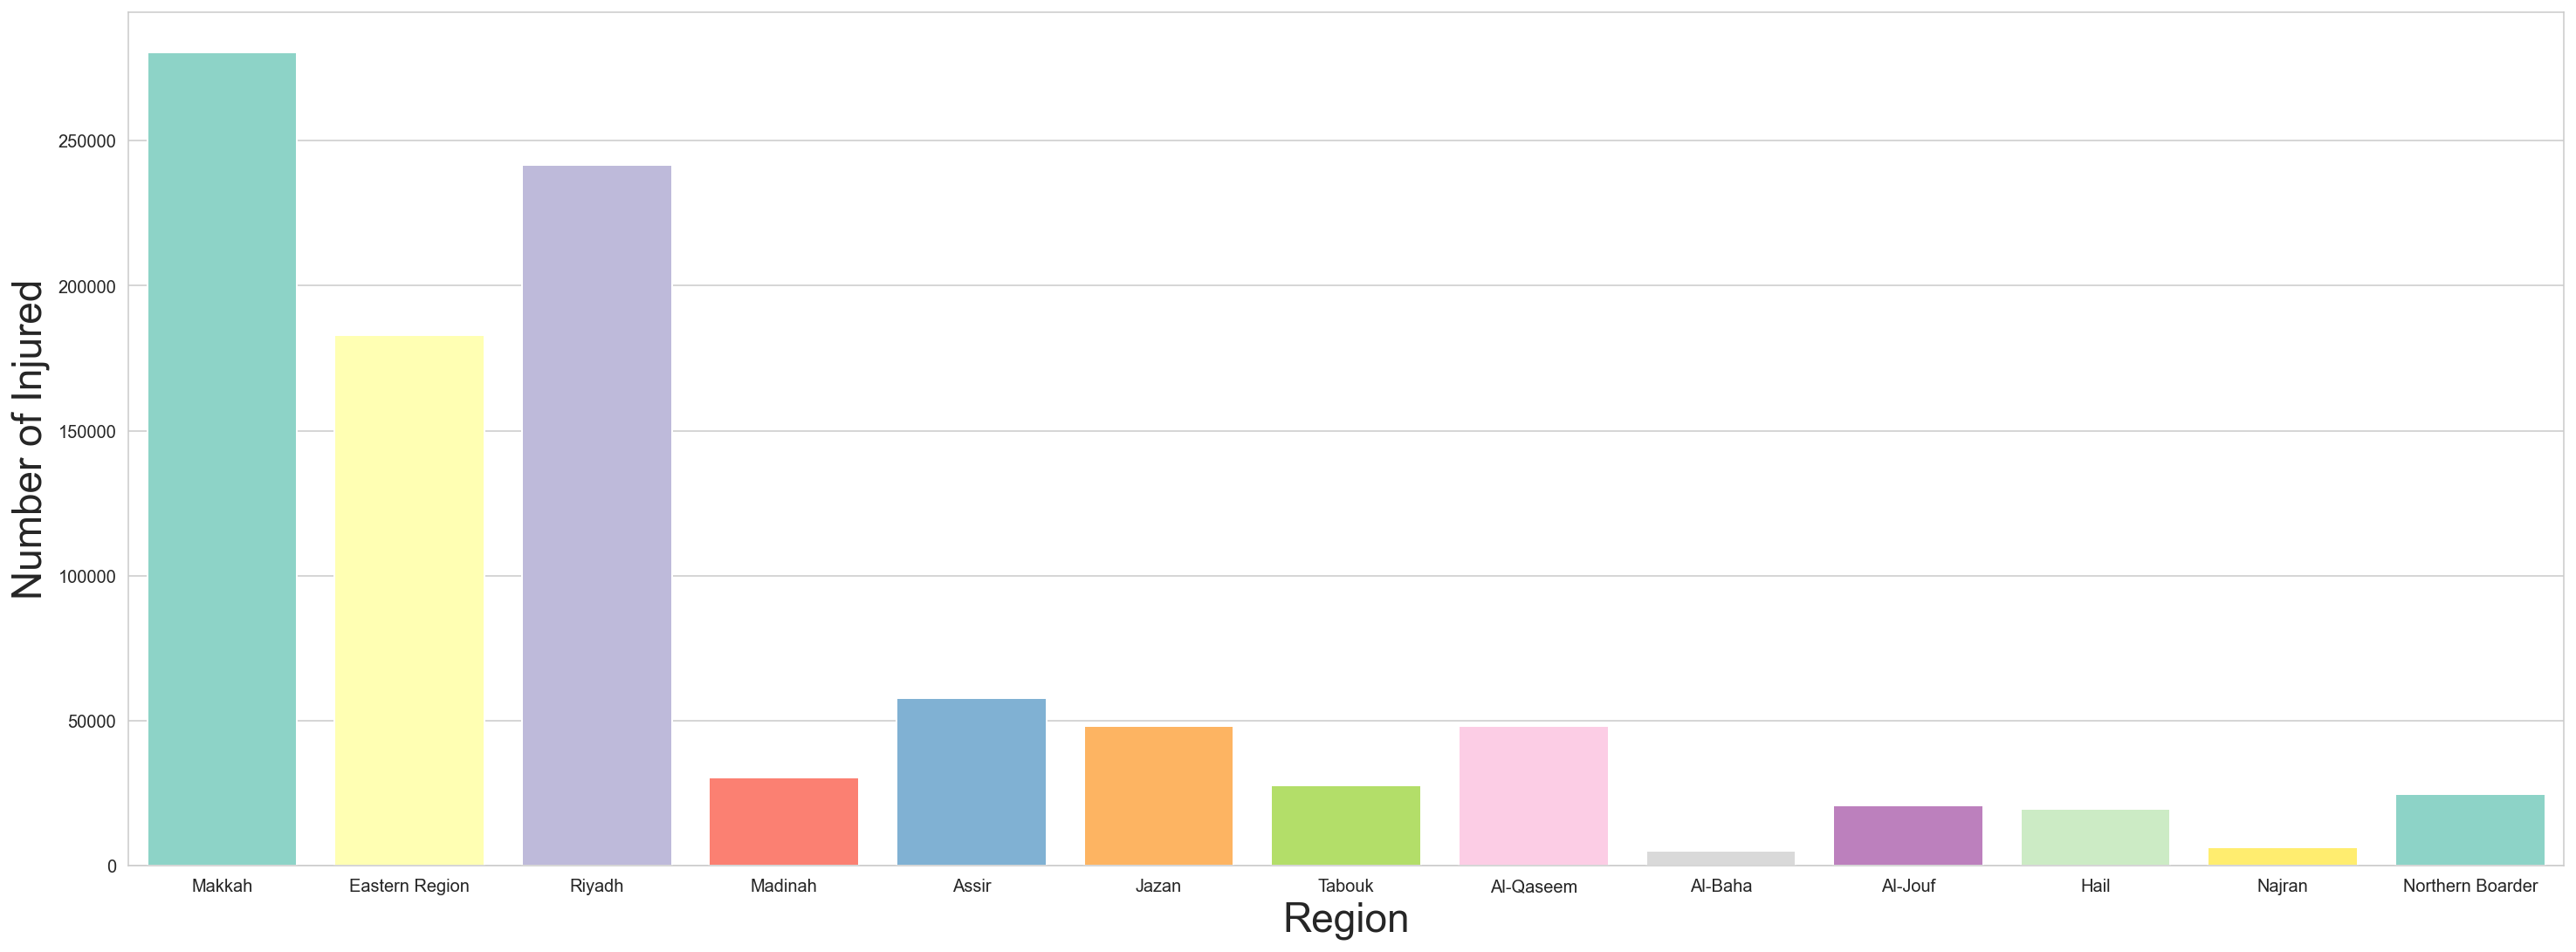

In [232]:
#shows Number of Injured in all Region
fig= plt.figure(figsize=(25,9))
sns.barplot(df_merged.groupby(['Region']).sum().sort_values(by = 'Num_Injured', ascending= False).index,
           df_merged.groupby(['Region']).sum().sort_values(by = 'Num_Injured', ascending= False)['Num_of_accidents'],
            saturation=5,palette='Set3');

plt.ylabel('Number of Injured', size=23)
plt.xlabel('Region', size=23);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


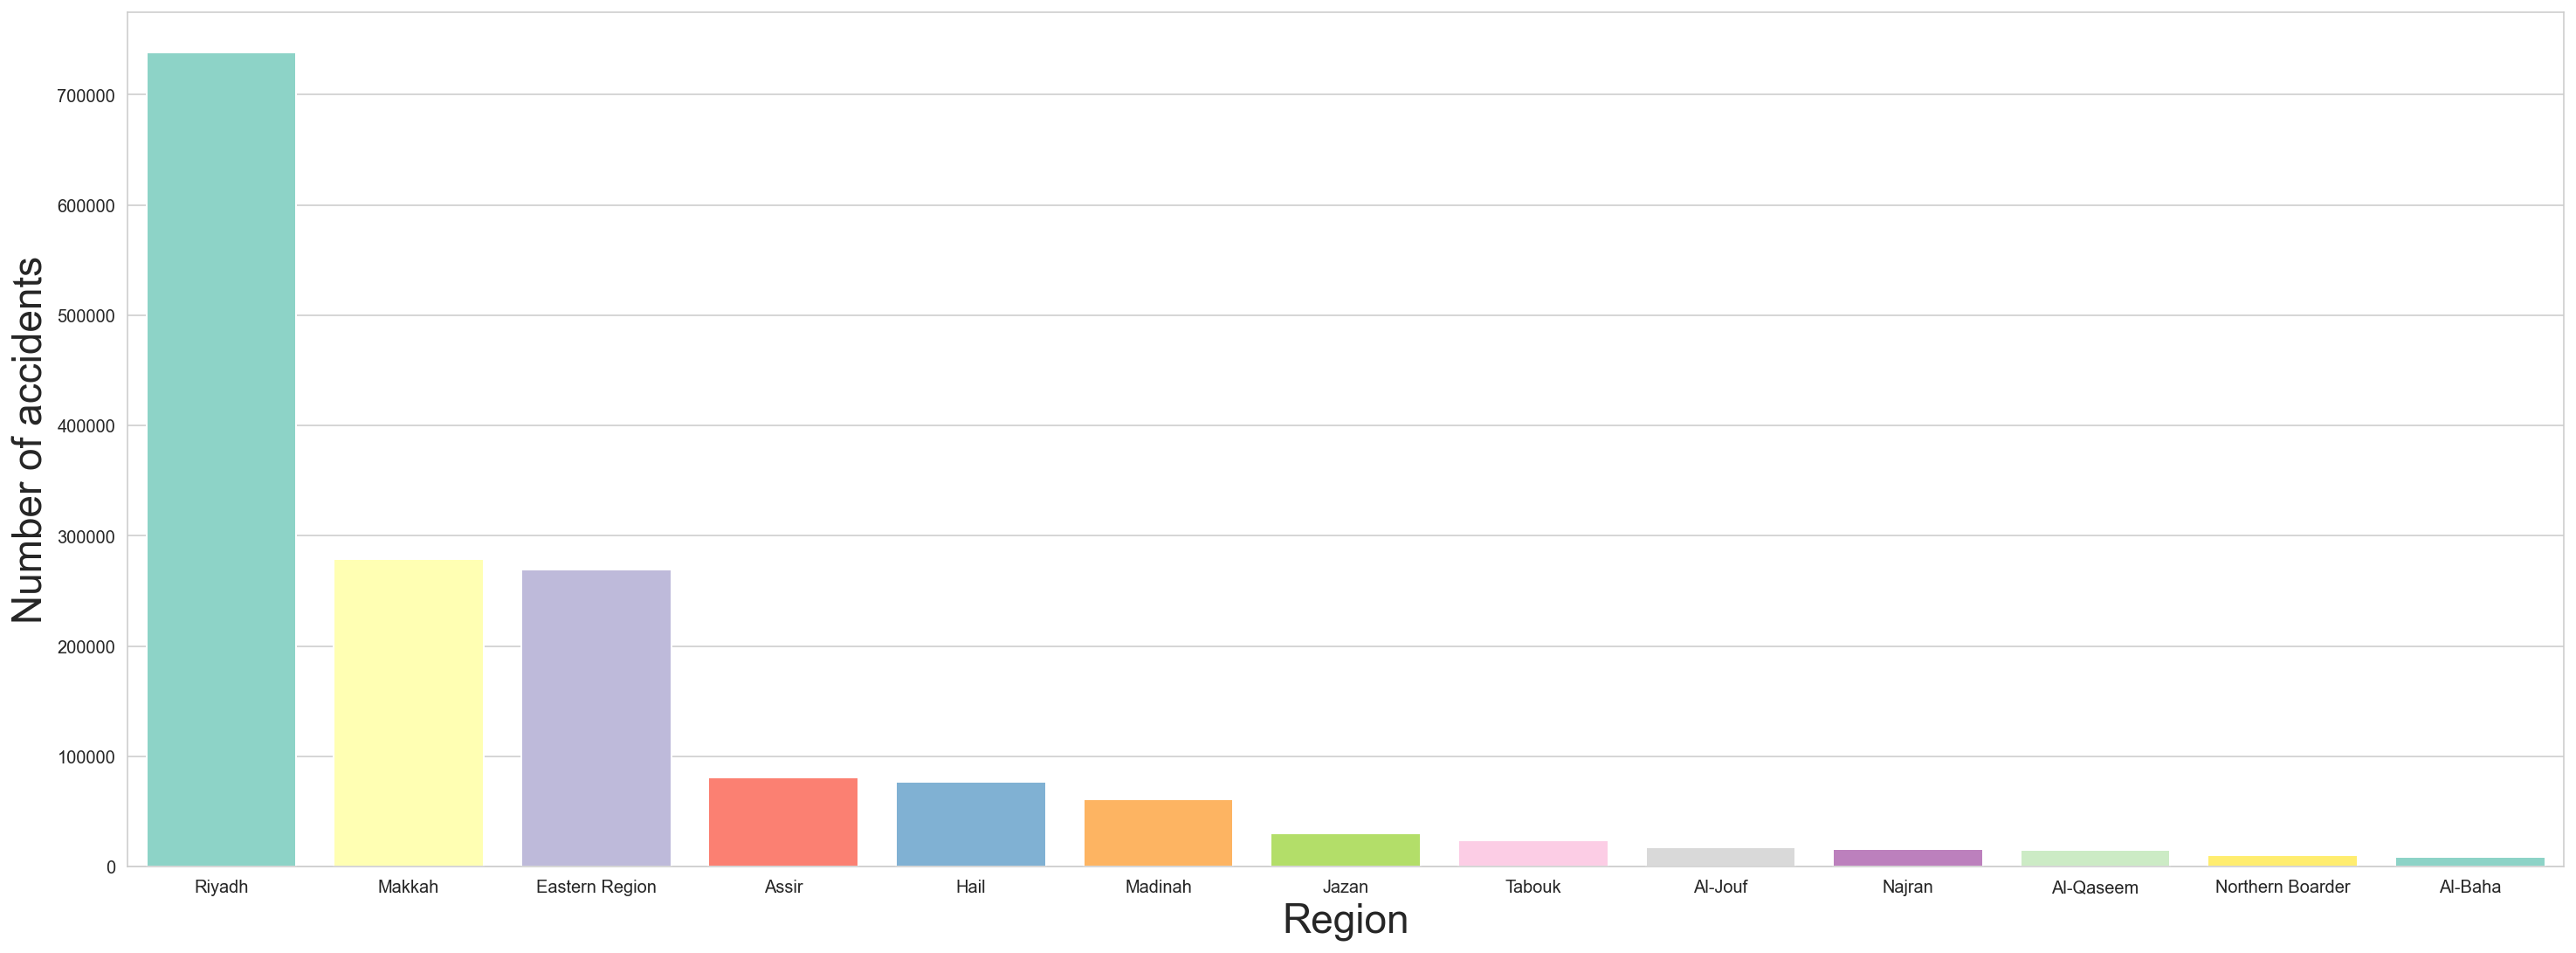

In [233]:
#shows Number of accidents in all Region
fig= plt.figure(figsize=(25,9))
sns.barplot(df_merged.groupby(['Region']).sum().sort_values(by = 'Driving_liceses', ascending= False).index,
           df_merged.groupby(['Region']).sum().sort_values(by = 'Driving_liceses', ascending= False)['Driving_liceses'],
            saturation=5,palette='Set3');

plt.ylabel('Number of accidents', size=23)
plt.xlabel('Region', size=23);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\l

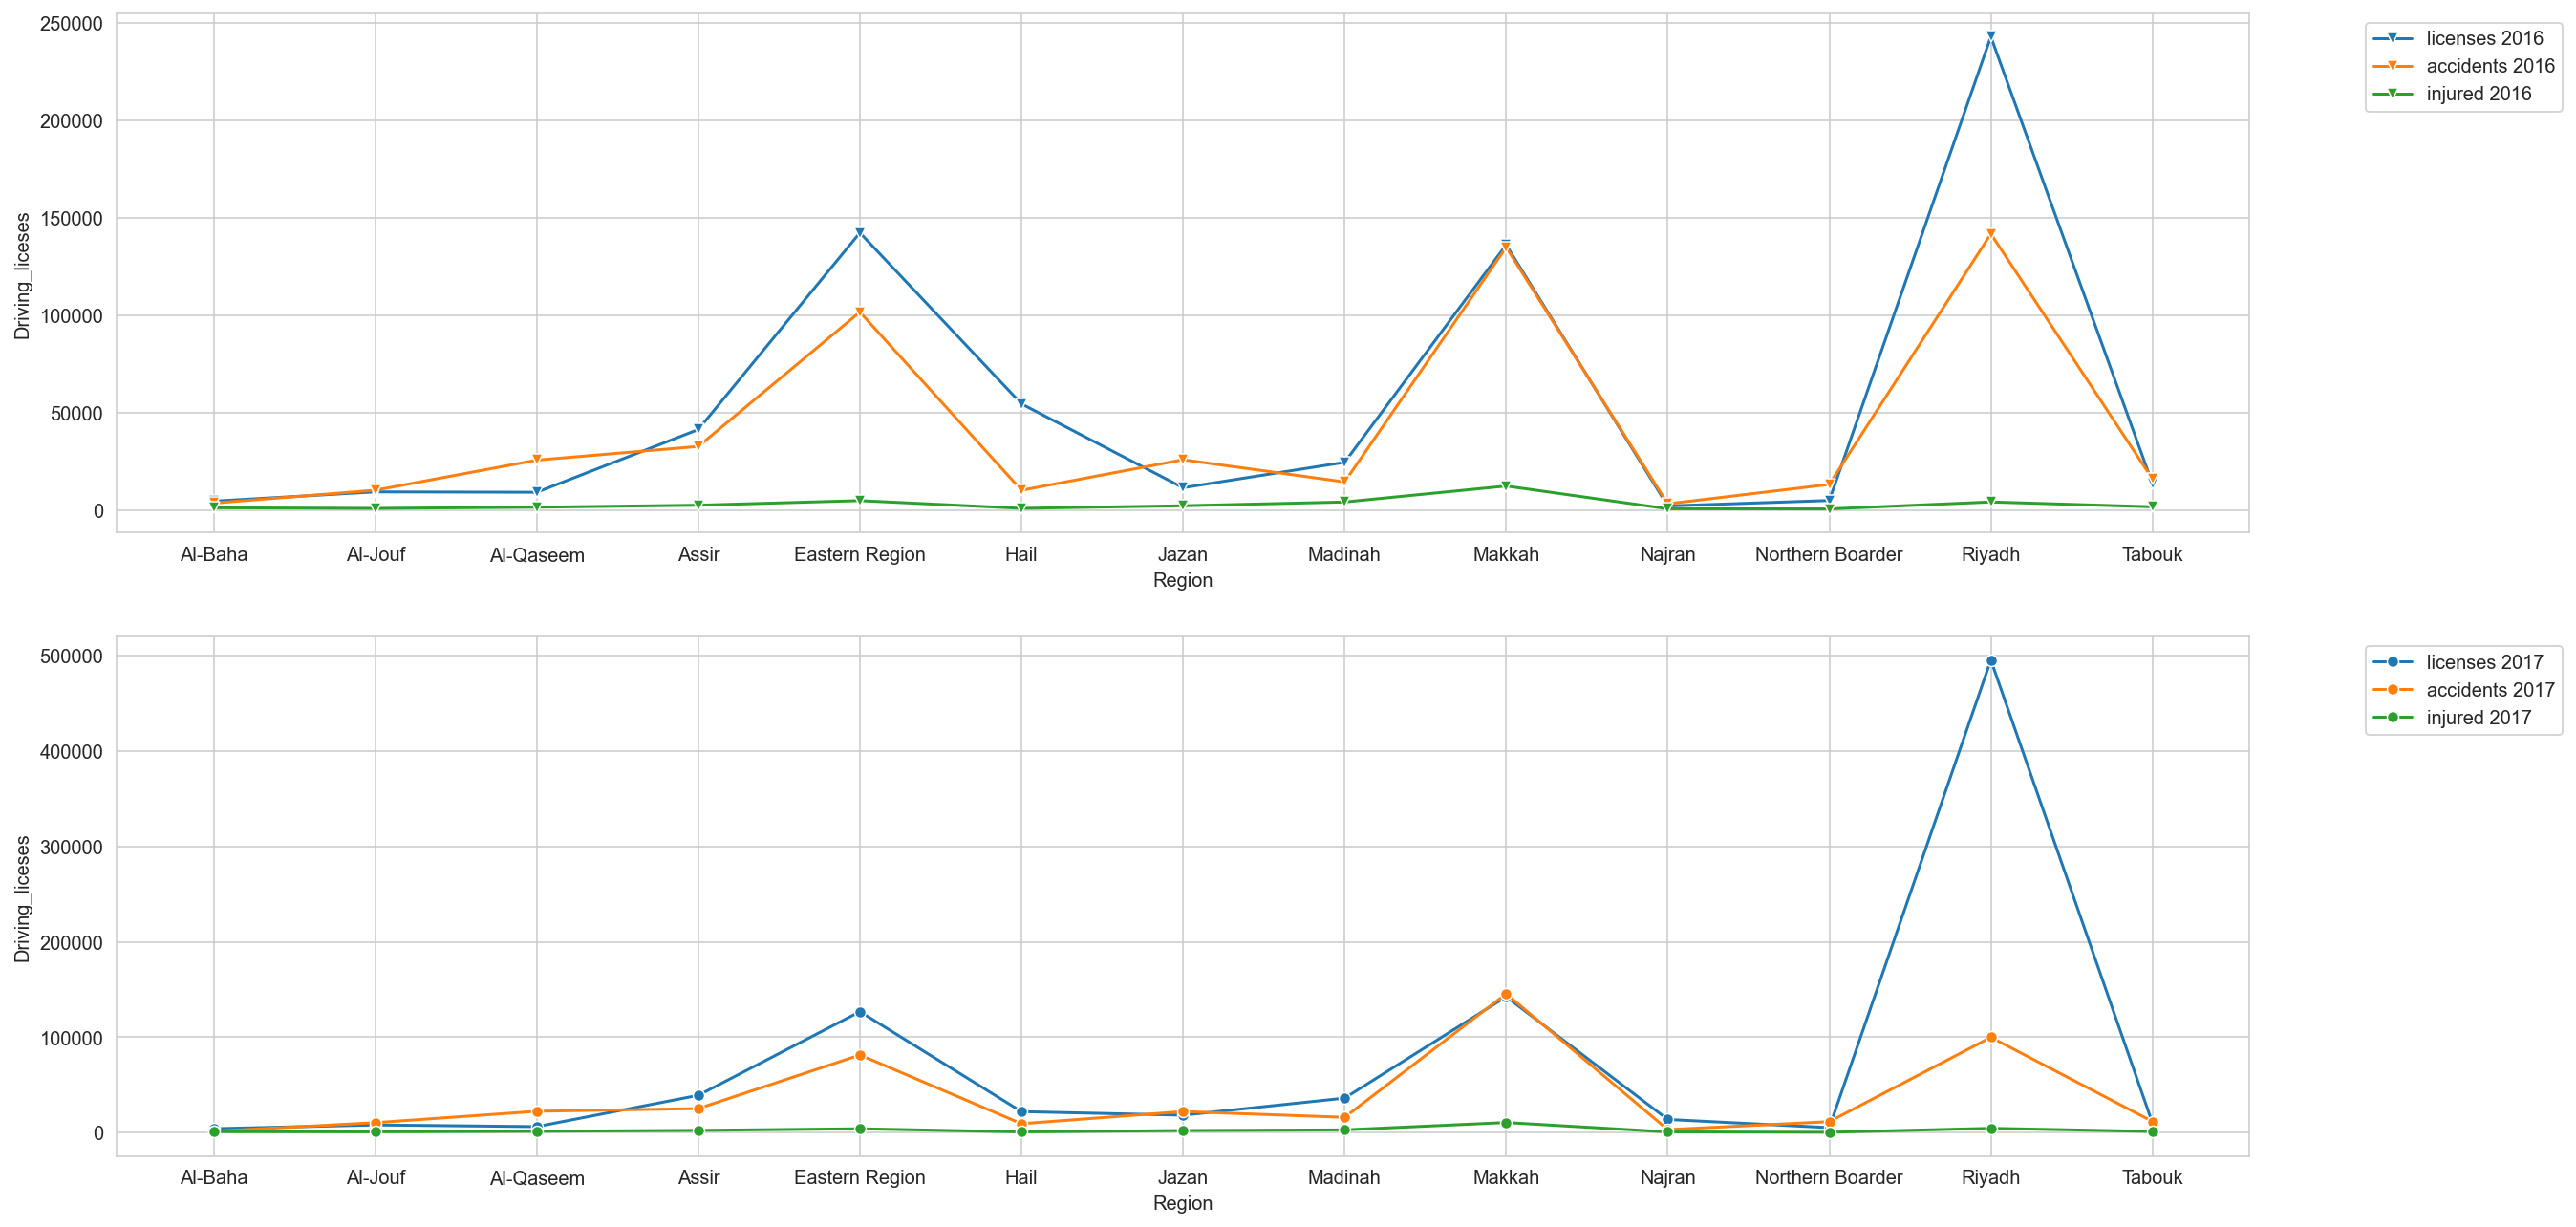

In [234]:
#shows Number of accidents,driving licenses,injured in all Region between two years 2016-2017
fig, ax = plt.subplots(2, 1, figsize=(20,11))
sns.lineplot(df_merged.loc[df_merged['Year'] == 2016]["Region"],
                   df_merged.loc[df_merged['Year'] == 2016]['Driving_liceses'], 
                   label='licenses 2016' ,marker='v', ax=ax[0])

sns.lineplot(df_merged.loc[df_merged['Year'] == 2016]["Region"], 
            df_merged.loc[df_merged['Year'] == 2016]['Num_of_accidents'],  
               label='accidents 2016', marker='v', ax=ax[0])

sns.lineplot(df_merged.loc[df_merged['Year'] == 2016]["Region"],
               df_merged.loc[df_merged['Year'] == 2016]['Num_Injured'], 
               label='injured 2016',marker='v', ax=ax[0])



sns.lineplot(df_merged.loc[df_merged['Year'] == 2017]["Region"],
                   df_merged.loc[df_merged['Year'] == 2017]['Driving_liceses'], 
                   label='licenses 2017' ,marker='o', ax=ax[1])

sns.lineplot(df_merged.loc[df_merged['Year'] == 2017]["Region"], 
            df_merged.loc[df_merged['Year'] == 2017]['Num_of_accidents'],  
               label='accidents 2017', marker='o', ax=ax[1])

sns.lineplot(df_merged.loc[df_merged['Year'] == 2017]["Region"],
               df_merged.loc[df_merged['Year'] == 2017]['Num_Injured'], 
               label='injured 2017',marker='o', ax=ax[1])

ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2 );
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2 );
plt.show()

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [236]:
df_merged.describe()

,Year,Num_of_accidents,Num_Dead,Num_Injured,Driving_liceses,longitude_y,latitude_x
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,3.000000
mean,2016.500000,38225.692308,635.384615,2743.038462,62507.000000,23.810447,44.747036
std,0.509902,46493.705035,549.783381,2922.641127,107293.917762,4.274533,4.716312
min,2016.000000,1414.000000,112.000000,374.000000,2153.000000,17.207231,41.440696
25%,2016.000000,10276.250000,241.250000,923.000000,8363.250000,20.148406,42.046638
50%,2016.500000,16050.500000,415.500000,1618.500000,16085.000000,23.288331,42.652581
75%,2017.000000,30981.250000,929.250000,3784.000000,51222.000000,27.400846,46.400205
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830


In [237]:
D= df_merged['Num_of_accidents']
mean=D.mean()
median=D.median()
mode=D.mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

Mean:  38225.692307692305 
Median:  16050.5 
Mode:  1414


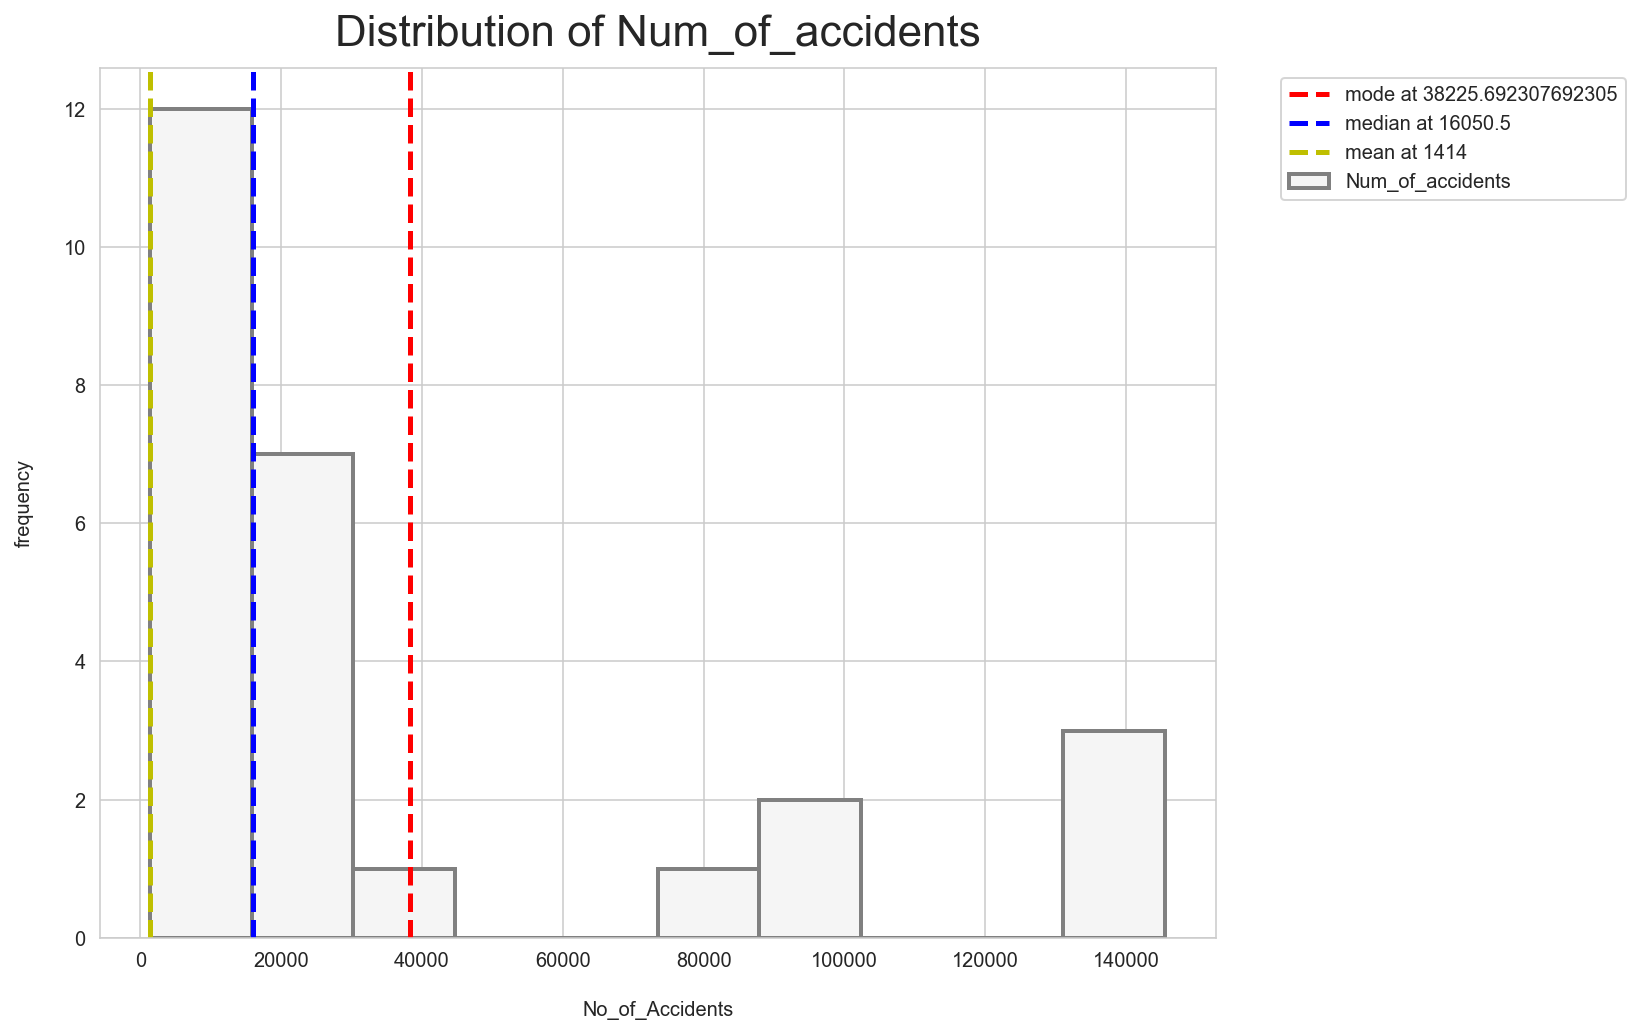

In [238]:
D.plot(kind='hist', figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("No_of_Accidents", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Distribution of Num_of_accidents", y=1.012, fontsize=22)
measurements = [mean, median, mode[0] ]
names = ["mode", "median", "mean"]
colors = ['r', 'b', 'y']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2 );

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

This assumption it's not holding this assumption because in the figure above shows it's the distribution is positively skewed because the Mod > medain > mean.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

In [239]:
AC= accidents['Num_of_accidents']
mean=AC.mean()
median=AC.median()
mode=AC.mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

Mean:  13868.038461538461 
Median:  1682.5 
Mode:  112


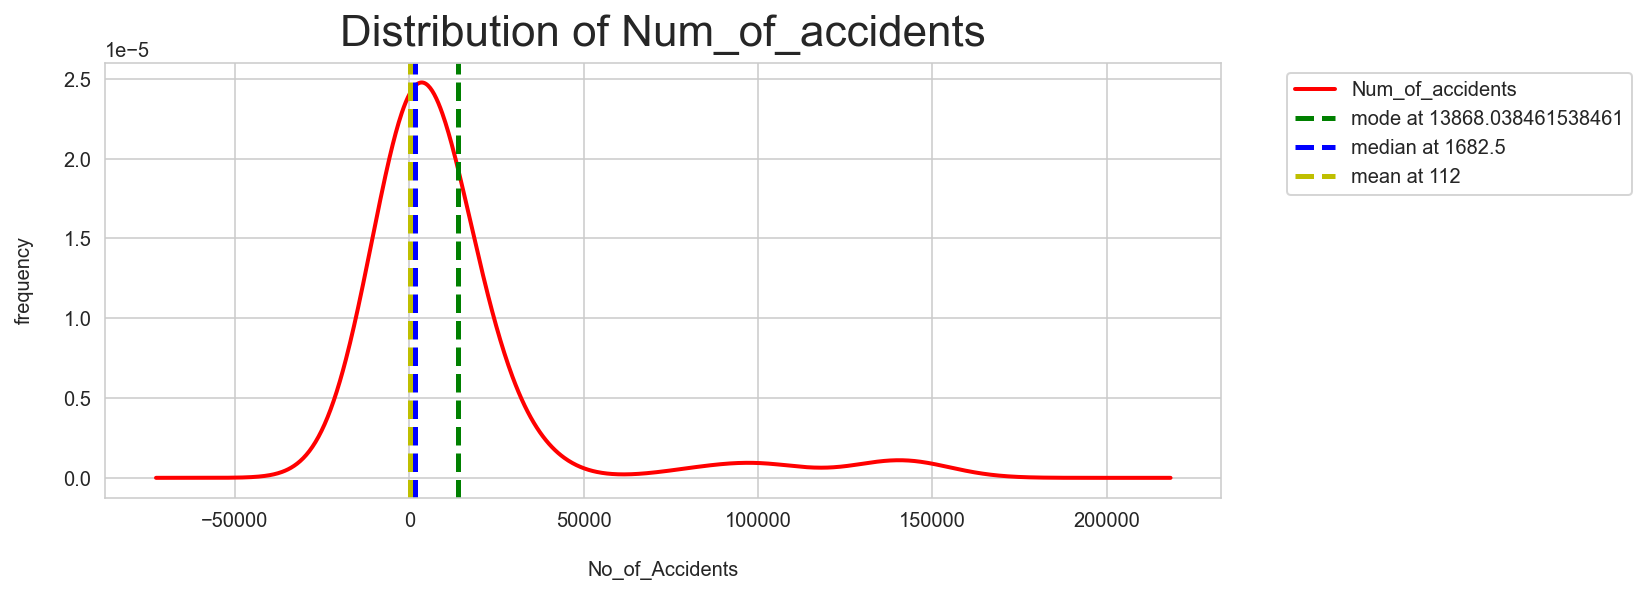

In [240]:
AC.plot(kind='density', figsize=(10, 4), linewidth=2, color='r')
plt.xlabel("No_of_Accidents", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Distribution of Num_of_accidents", y=1.012, fontsize=22);
measurements = [mean, median, mode[0] ]
names = ["mode", "median", "mean"]
colors = ['g', 'b', 'y']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2 );

No, it's not holding this assumption because in the figure above shows it's the distribution is positively skewed because the Mod > medain > mean.



In [241]:
Li= licenses['Driving_liceses']
mean=Li.mean()
median=Li.median()
mode=Li.mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

Mean:  28915.347692307692 
Median:  10267.0 
Mode:  915


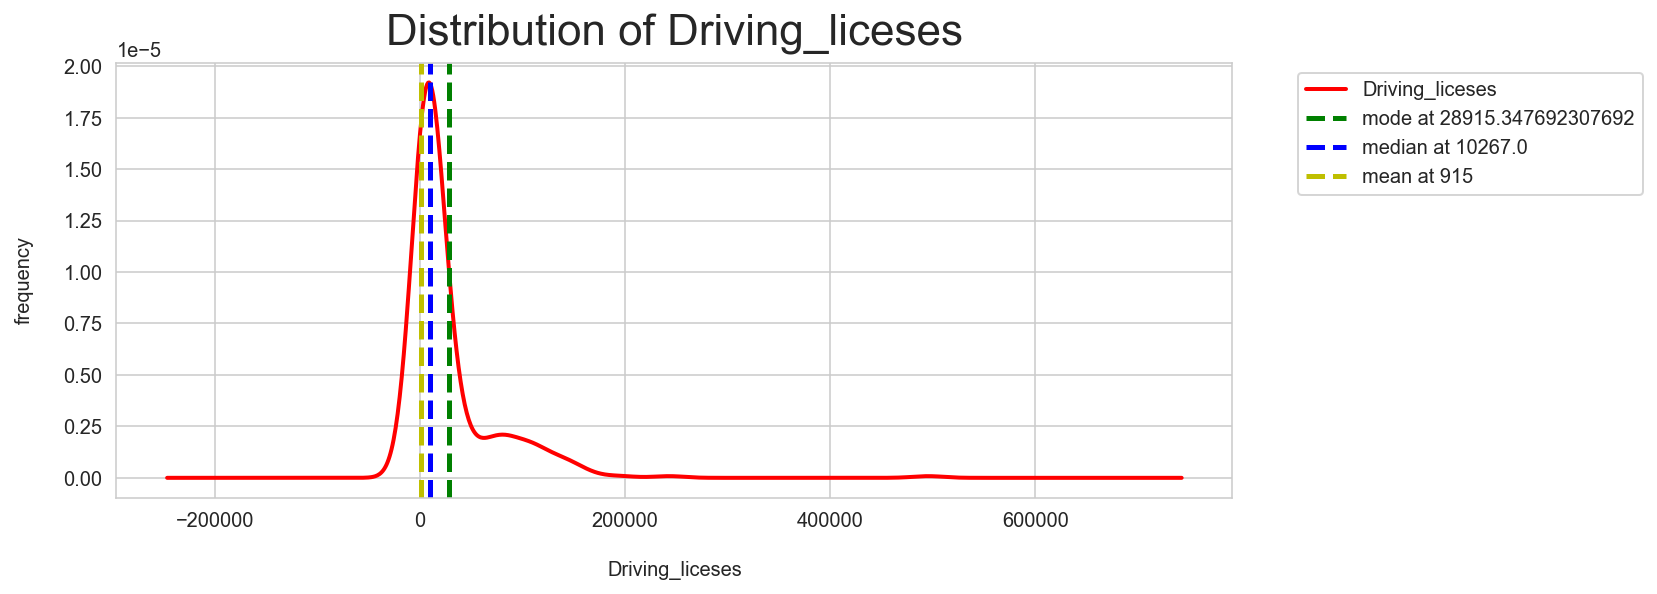

In [242]:
Li.plot(kind='density', figsize=(10, 4), linewidth=2, color='r')
plt.xlabel("Driving_liceses", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Distribution of Driving_liceses", y=1.012, fontsize=22);
measurements = [mean, median, mode[0] ]
names = ["mode", "median", "mean"]
colors = ['g', 'b', 'y']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2 );

- Also here it's not holding this assumption because in the figure above shows it's the distribution is positively skewed because the Mod > medain > mean.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 


- In Riyadh, Makkah and Eastern, I found some interesting patterns, because they a big city so they have the majority of data

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

- I noticed in Riyadh, Makkah and Eastern, I found some interesting patterns, because they a big city so they have the majority of data

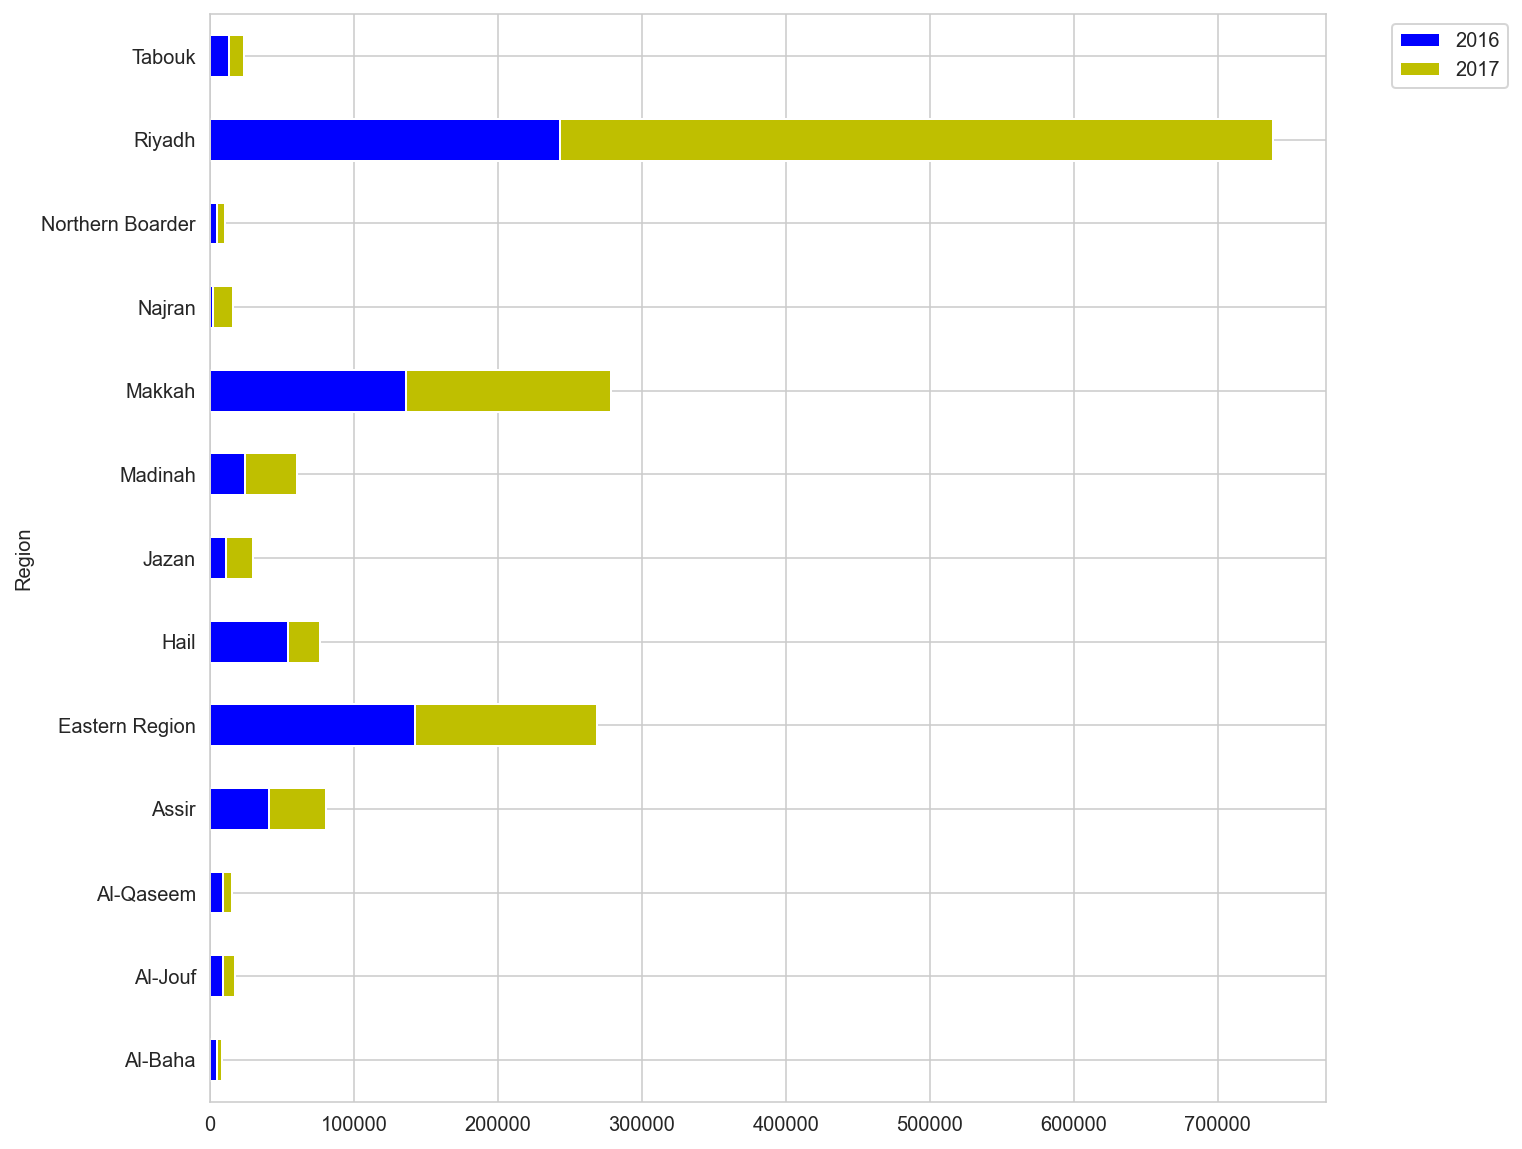

In [247]:
#Shows Number of accidents of all Regions between two years 2016-2017
DF = df_merged.pivot_table(index=['Region'],columns='Year', values='Driving_liceses')
DF.loc[:,[2016, 2017]].plot.barh(stacked=True, color=[ 'b', 'y'], figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2 );

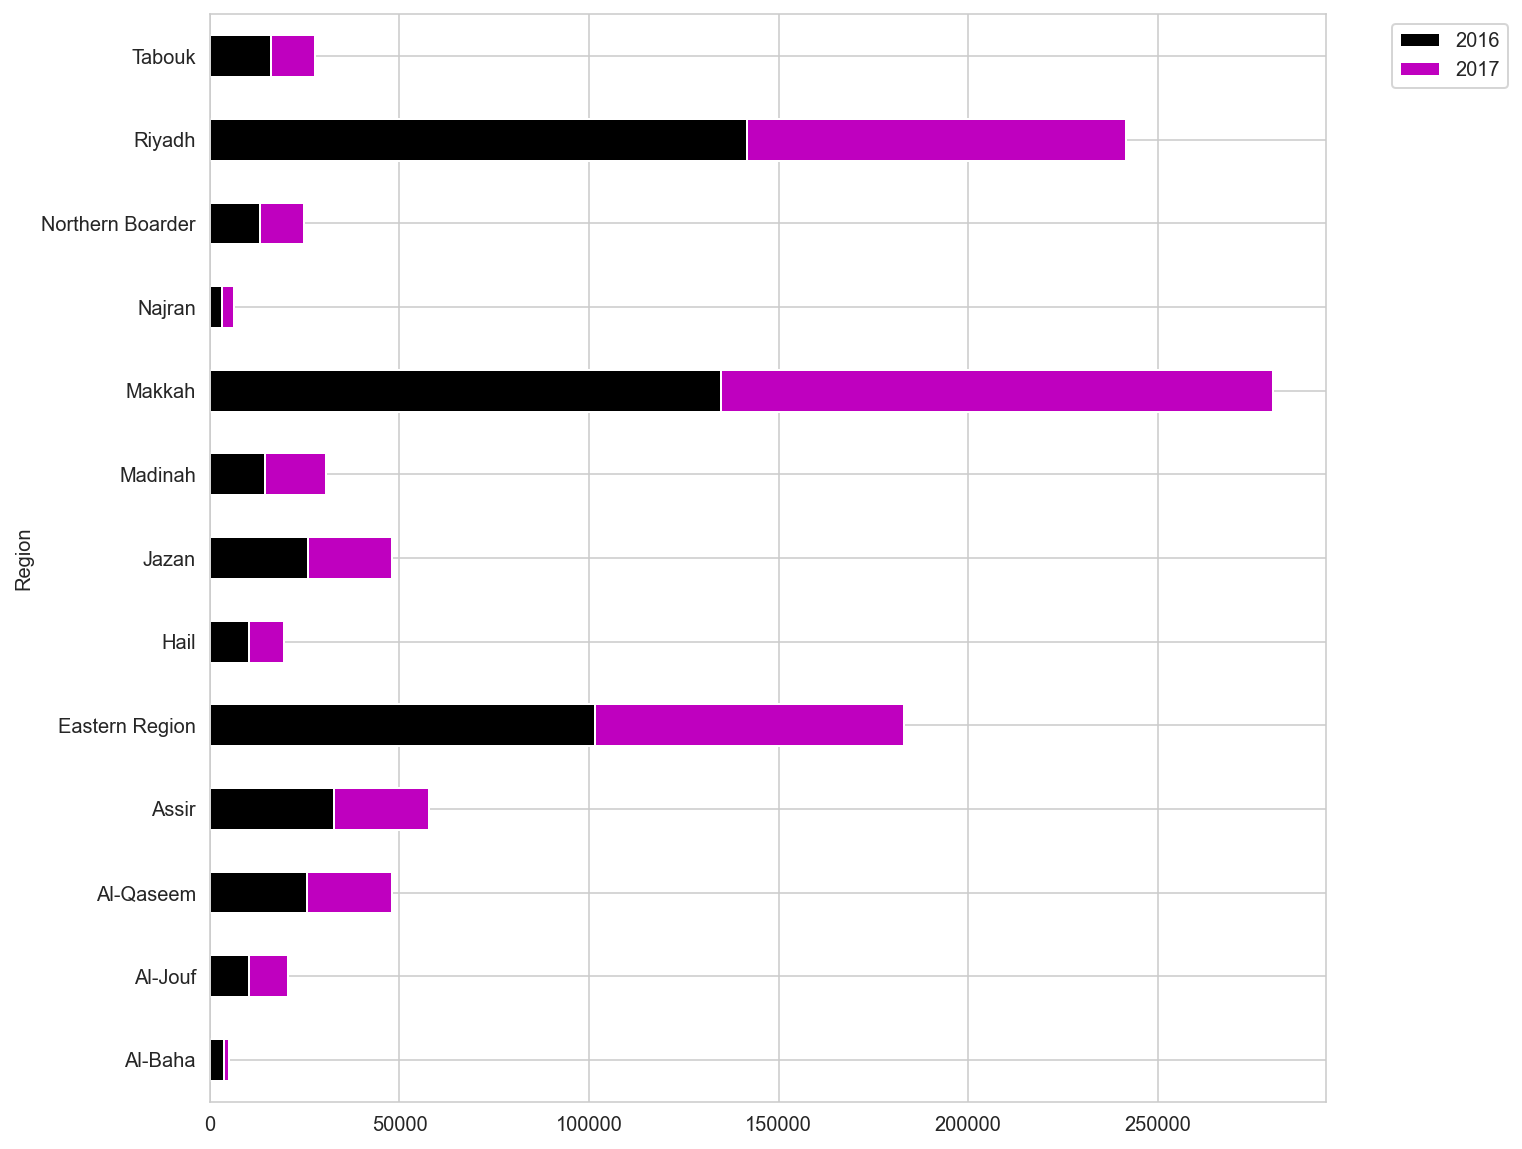

In [248]:
# Number of Driving licenses  all Regions between two years 2016-2017
DF = df_merged.pivot_table(index=['Region'],columns='Year', values='Num_of_accidents').reset_index()
DF.plot(x="Region", y=accidents['Year'].unique(), kind="barh",stacked =True, figsize=(10,10) , color=[ 'k', 'm'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2 );

Answer:

(80%) of traffic accidents that leave casualties in the Kingdom occur within cities, while (18%) only occur outside cities or on highways, as most of them are in major cities for the transportation of village residents to them.

- Makkah: One of the reasons for the increase in the problem of traffic accidents in the Makkah region is the rapid development in the increase in the number of private and public taxis, especially during the days of Hajj.

- The increase in traffic accidents in the "Makkah" region, the rapid development of the road network inside and outside cities, in addition to the nature of the road and its traffic density, the engineering defects represented in the wrong design of the road, the neglect of loose animals on the roads, the lack of adequate lighting, as well as the lack of traffic signs.

- Al-Baha: The reason for the decrease in the rate of traffic accidents in the Al-Baha region and its governorates to 80%.
They are the automatic monitoring cameras (Saher) in light of the presence of 22 Saher cameras distributed in the main roads in Al-Baha and its governorates.


The Ministry of Transport revealed a decrease in the number of traffic accident deaths on its 68,000 km roads in the Kingdom to more than 33% in 2018 compared to 2017.
In response to achieving the goals of the Kingdom's Vision 2030, which seeks to reach 8 deaths for every 100,000 citizens, with 26 cases due in 2015, on all roads of the Kingdom.

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:

My recommendations bear the same initiatives .Also there is a source that caught my attention it is about women driving in last year and I cited this content below.


The Ministry's initiatives in Vision 2030:

- An initiative to reduce road accident deaths:

-      The Ministry of Transport is working in the transportation system with the initiative to reduce road accident deaths by 25 percent by the year 2020 AD, within the objectives of the Kingdom's Vision 2030, so that our roads are safer and avoid human and material losses that burden our national economy, which requires urgent and urgent measures to be taken. To achieve it under the guidance of the wise leadership and with the support of all concerned parties and partners.

-   The Ministry has made progress in terms of the road safety performance indicator, which is the rate of road accident deaths per 100,000 people. With the help of God, the efforts of the parties participating in this initiative were able to reduce the index from 28.4 as an actual value in 2016 to 23.1 at the end of 2017. The goal is to reach 22 by the end of this year, then to 20 by the end of 2020. (Thanks to God, reports of accidents on the Ministry of Transport's roads recorded a decrease during the first quarter of the current year 2018 to 19 cases).



- Increasing safety rates in existing and new road projects:

-    The General Administration of Safety that was created in the ministry has worked to set the necessary standards to raise the safety rates in current and new road projects Since last year, this department has surveyed more than 46 thousand kilometers of roads to treat black spots, which are the sites of frequent accidents. Thanks to the technologies used to collect traffic data, speed rates and automatically monitor road accident information, it was able to address a total of 188 black points until the end of the first quarter of this year.

- Also when women are allowed to drive, we notice a decrease in the percentage of the number of people who died due to road accidents decreased to 38%, while the number of accident injuries decreased to 56%, and the percentage of serious accidents decreased to 52% .Women drivers are less likely to cause road accidents than men in the past year 2019.

[1]https://shms.sa/authoring/112794-%D8%A7%D9%84%D9%85%D8%B4%D9%83%D9%84%D8%A7%D8%AA-%D8%A7%D9%84%D8%A7%D8%AC%D8%AA%D9%85%D8%A7%D8%B9%D9%8A%D8%A9-%D9%88%D8%A7%D9%84%D8%A7%D9%82%D8%AA%D8%B5%D8%A7%D8%AF%D9%8A%D8%A9-%D9%88%D8%A7%D9%84%D8%B5%D8%AD%D9%8A%D8%A9-%D9%84%D9%84%D8%AD%D9%88%D8%A7%D8%AF%D8%AB-%D8%A7%D9%84/view

[2] https://www.mot.gov.sa/ar/MediaCenter/News/Pages/new986.aspx

[3]https://www.okaz.com.sa/local/na/1599638

[4] https://www.mot.gov.sa/ar/AboutUs/Pages/MinistryInitiatives.aspx

[5] https://ajel.sa/w7qj2c/